In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [4]:
#check for duplicates :
df.duplicated().sum()

24

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(32536, 15)

# checking misiing values

In [7]:
#check fr abnormal values :
for i in ['','-',' ','NA','NAN','?',' ?','$','0']:
    print(df.isin([i]).sum().any())

False
False
False
False
False
False
True
False
False


There are abnormal values ' ?'

In [8]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [9]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
#First replace ' ?' with nan values :
df = df.replace(' ?',np.nan)

In [11]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

columns Workclass ,Occupation ,Native_country are categorical columns so we will use mode methdod to fill nan values

In [12]:
df['Workclass'] = df['Workclass'].fillna(df['Workclass'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Native_country'] = df['Native_country'].fillna(df['Native_country'].mode()[0])

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [14]:
df.isin([' ?']).sum().any()

False

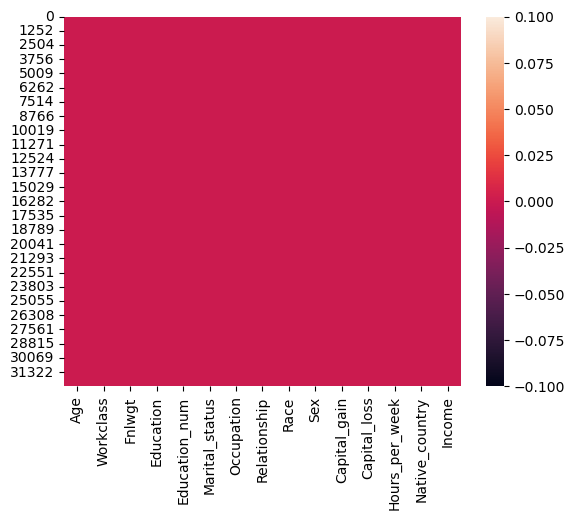

In [15]:
sns.heatmap(df.isnull())
plt.show()

There are no missing values

# Statistical data analytics

In [16]:
#drop unnescessary columns:
df.drop(['Fnlwgt','Education_num'],axis=1 , inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Education       32536 non-null  object
 3   Marital_status  32536 non-null  object
 4   Occupation      32536 non-null  object
 5   Relationship    32536 non-null  object
 6   Race            32536 non-null  object
 7   Sex             32536 non-null  object
 8   Capital_gain    32536 non-null  int64 
 9   Capital_loss    32536 non-null  int64 
 10  Hours_per_week  32536 non-null  int64 
 11  Native_country  32536 non-null  object
 12  Income          32536 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


In [18]:
for i in df.columns:
    print(i),' : '
    print(df[i].value_counts())
    print('-'*50)
    print('\n')
    

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
--------------------------------------------------


Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------------------


Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
--------------------------------------------------


Marital_status
 Married-civ

In [19]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)
print('number of categorical columns = ',len(cat))
print('categorical columns are :\n',cat)
print('-'*50)
print('number of numerical columns = ',len(num))
print('numerical columns are :\n',num)

number of categorical columns =  9
categorical columns are :
 ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
--------------------------------------------------
number of numerical columns =  4
numerical columns are :
 ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


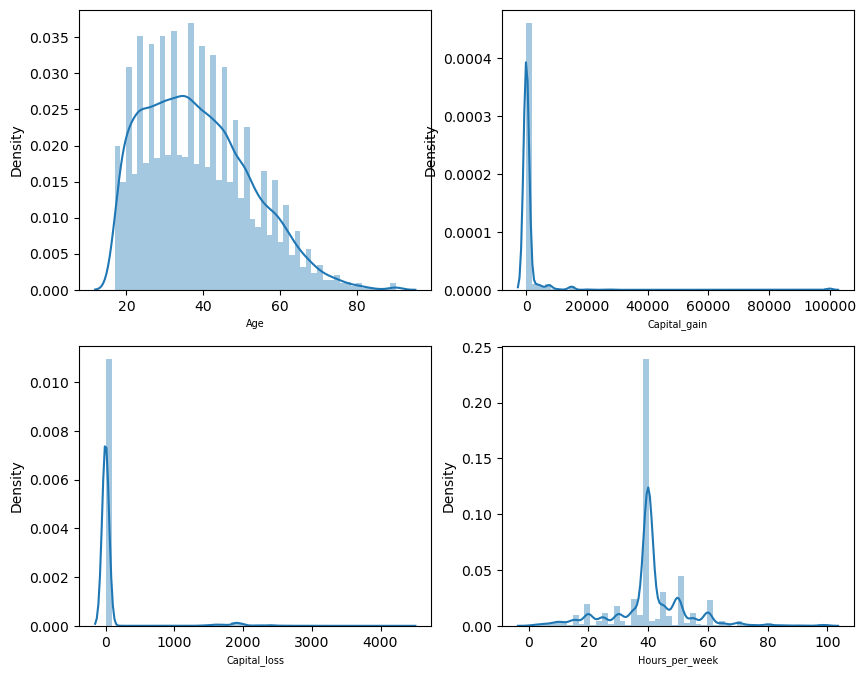

In [20]:
plt.figure(figsize=(10,8))
plot = 1
for i in num:
    if plot <=4:
        ax= plt.subplot(2,2,plot)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=7)
    plot +=1
plt.show()    

In [21]:
df.describe()

,Age,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1078.410069,87.370912,40.440343
std,13.638193,7388.068465,403.107737,12.347079
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


- all columns are the same shape
- all columns are skewed to right as mean is greater than median
- all columns have outliers as there is a big difference between maximum value and 75%

# Data Visualization

In [22]:
print('maximum age = ',df['Age'].max())
print('minimum age = ',df['Age'].min())

maximum age =  90
minimum age =  17


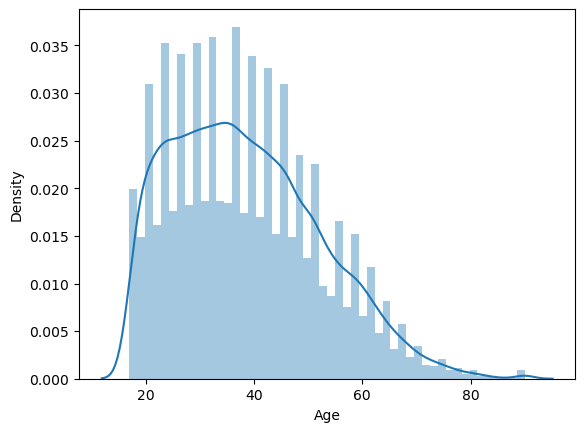

In [23]:
sns.distplot(df['Age'])
plt.show()

- Most of population are between age 30-40

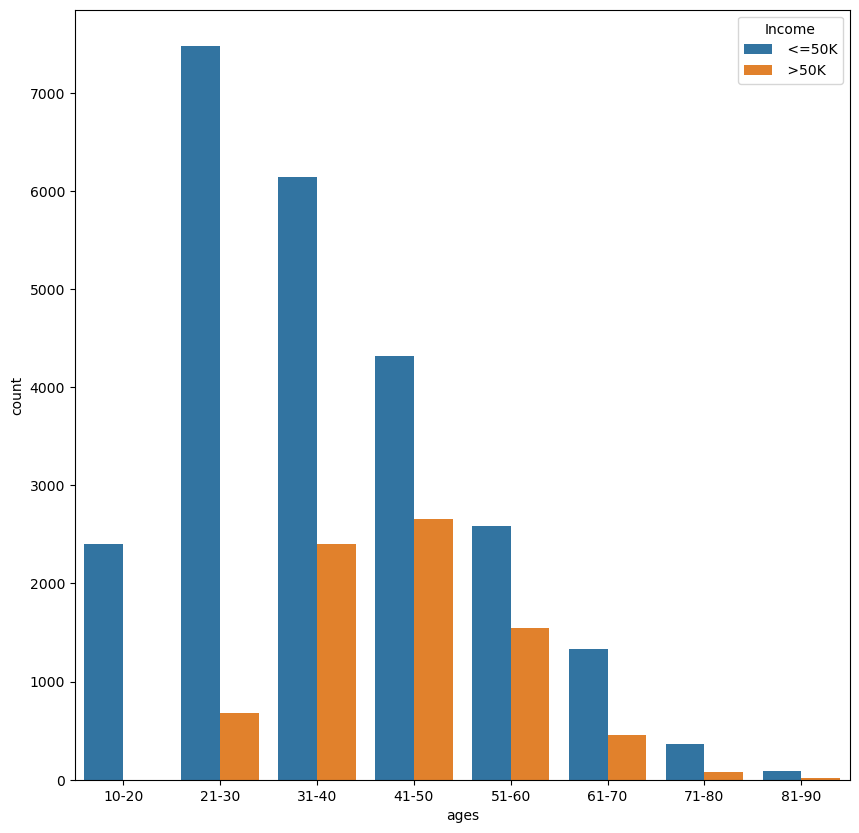

In [24]:
df['ages'] = pd.cut(df['Age'],bins=np.arange(10,100,10),
                   labels=['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90'],
                    include_lowest=True)

plt.figure(figsize=(10,10))
sns.countplot(x=df['ages'] , hue= df['Income'] )
plt.show()

- population at age between 41 to 50 have the highest income > 50K
- population lower than 20 have no income > 50K
- the majority of population at age between 21 to 30 have income <= 50K
- ppulation above age 70 have the lwest income rate

In [25]:
df.drop('ages',axis=1 , inplace=True)

In [26]:
df

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [27]:
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

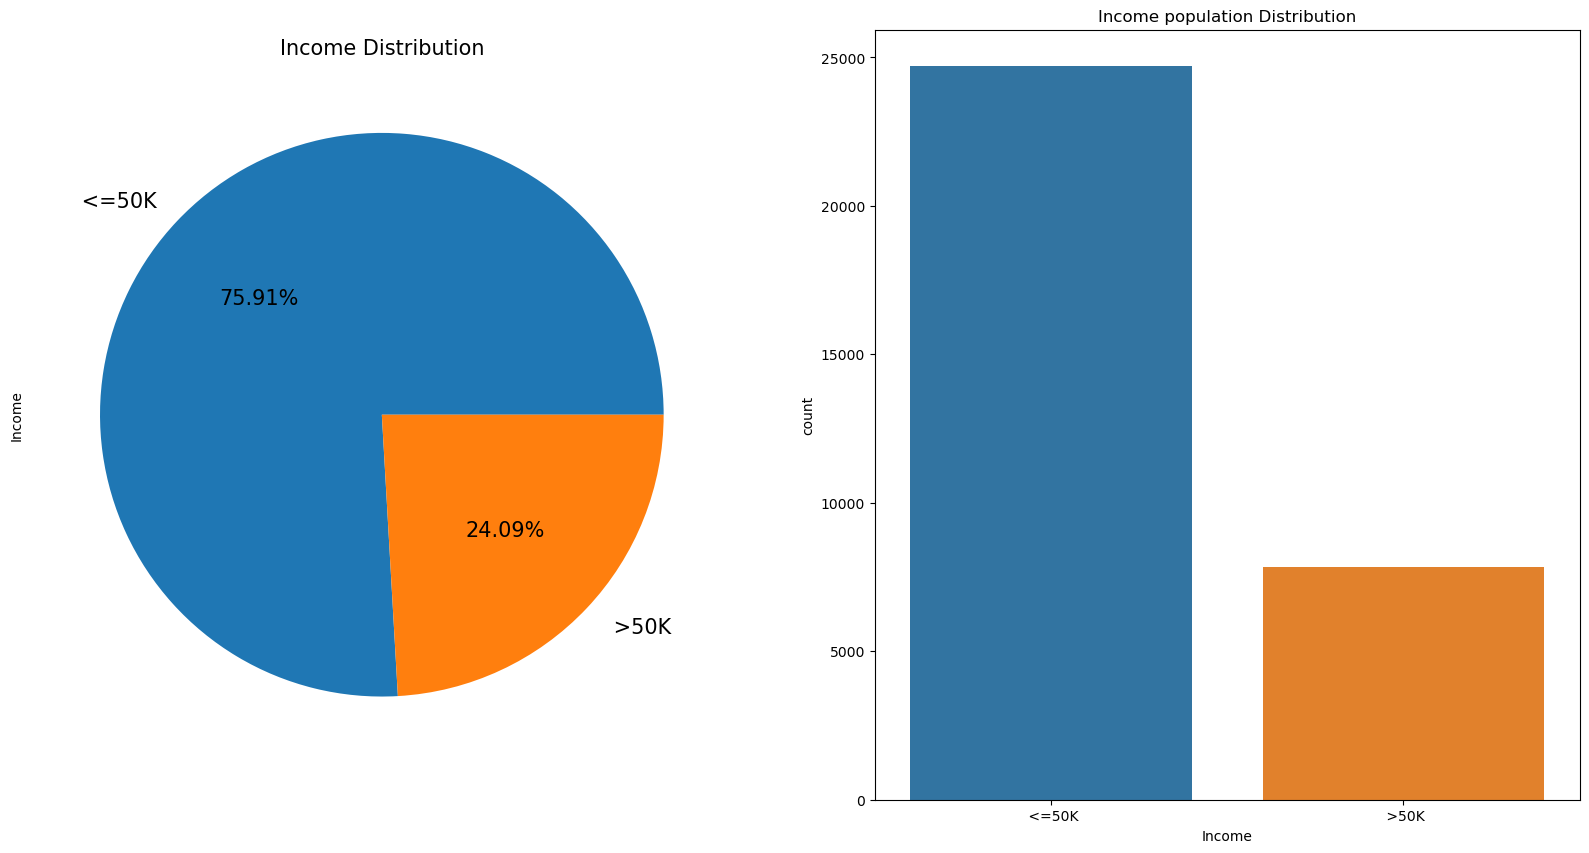

In [28]:
figure , axx = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x = df['Income'],ax= axx[1])
axx[1].set_title('Income population Distribution')
df['Income'].value_counts().plot(kind='pie',ax=axx[0], autopct='%.2f%%',fontsize=15)
axx[0].set_title('Income Distribution',fontsize=15)
plt.show()

- 75.91 % of population have income <= 50 K
- about 24% of population have income > 50K

Income              <=50K   >50K    All
Workclass                              
 Federal-gov          589    371    960
 Local-gov           1476    617   2093
 Never-worked           7      0      7
 Private            19357   5152  24509
 Self-emp-inc         494    622   1116
 Self-emp-not-inc    1816    724   2540
 State-gov            944    353   1297
 Without-pay           14      0     14
All                 24697   7839  32536


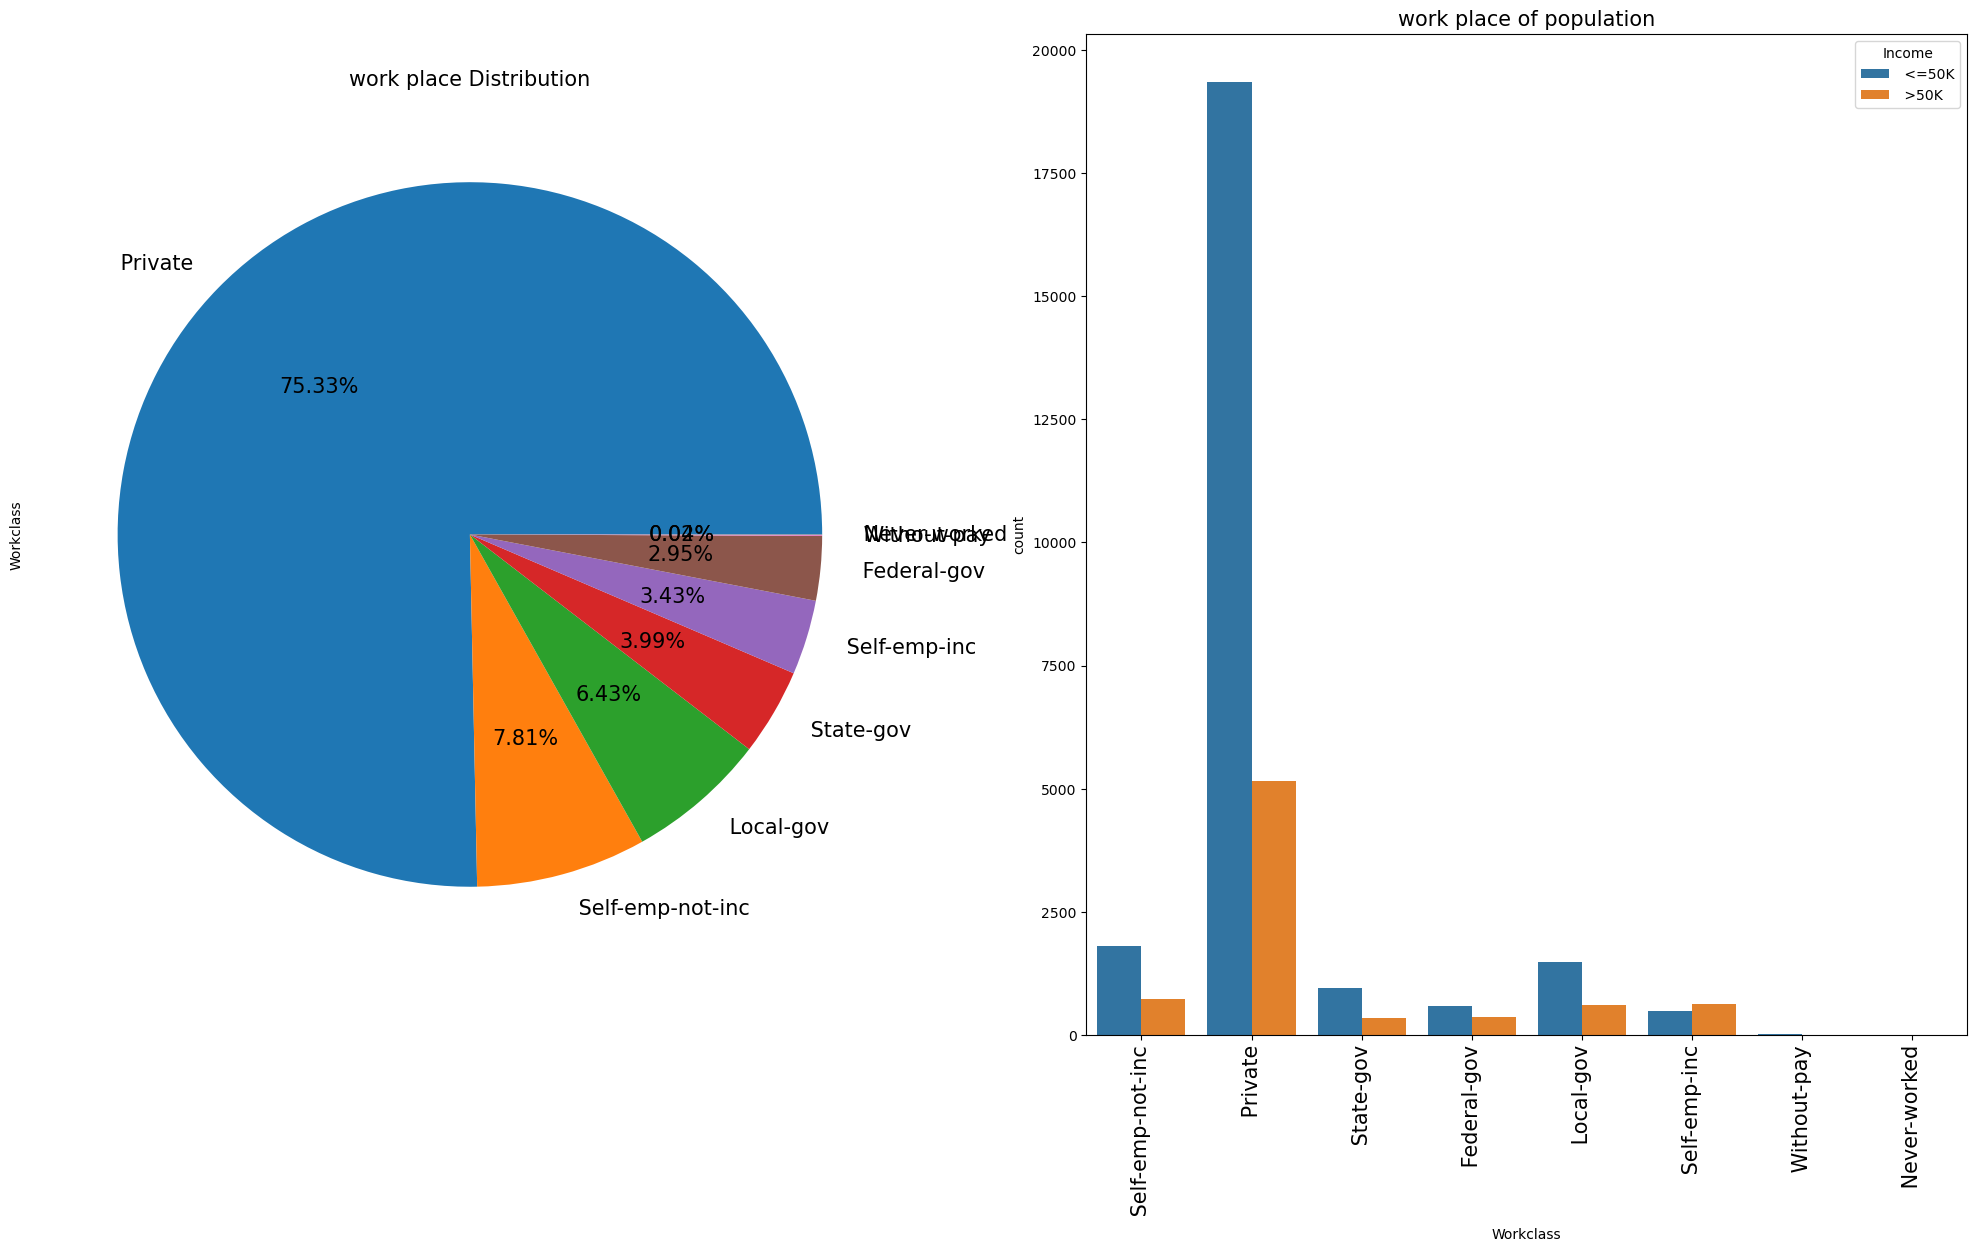

In [29]:
print(pd.crosstab(df['Workclass'],df['Income'] , margins=True))
figure , axx = plt.subplots(1,2,figsize=(25,13))

sns.countplot(x = df['Workclass'] , hue=df['Income'] , ax=axx[1])
axx[1].set_title('work place of population' , fontsize=15)

df['Workclass'].value_counts().plot(kind='pie',autopct='%.2f%%',ax=axx[0] , fontsize=15)
axx[0].set_title('work place Distribution' , fontsize=15)

plt.xticks(rotation=90, fontsize=15)
plt.show()

- 75.33 % of population are working in private sector
- 7.81 % of population are self - employed
- about 25 % of people who are working in private sector are earning <= 50K per year
- less than 50 % of the population have income more than 50K

Income          <=50K   >50K    All
Education                          
 10th             871     62    933
 11th            1115     60   1175
 12th             400     33    433
 1st-4th          160      6    166
 5th-6th          316     16    332
 7th-8th          605     40    645
 9th              487     27    514
 Assoc-acdm       802    265   1067
 Assoc-voc       1021    361   1382
 Bachelors       3131   2221   5352
 Doctorate        107    306    413
 HS-grad         8820   1674  10494
 Masters          763    959   1722
 Preschool         50      0     50
 Prof-school      153    423    576
 Some-college    5896   1386   7282
All             24697   7839  32536


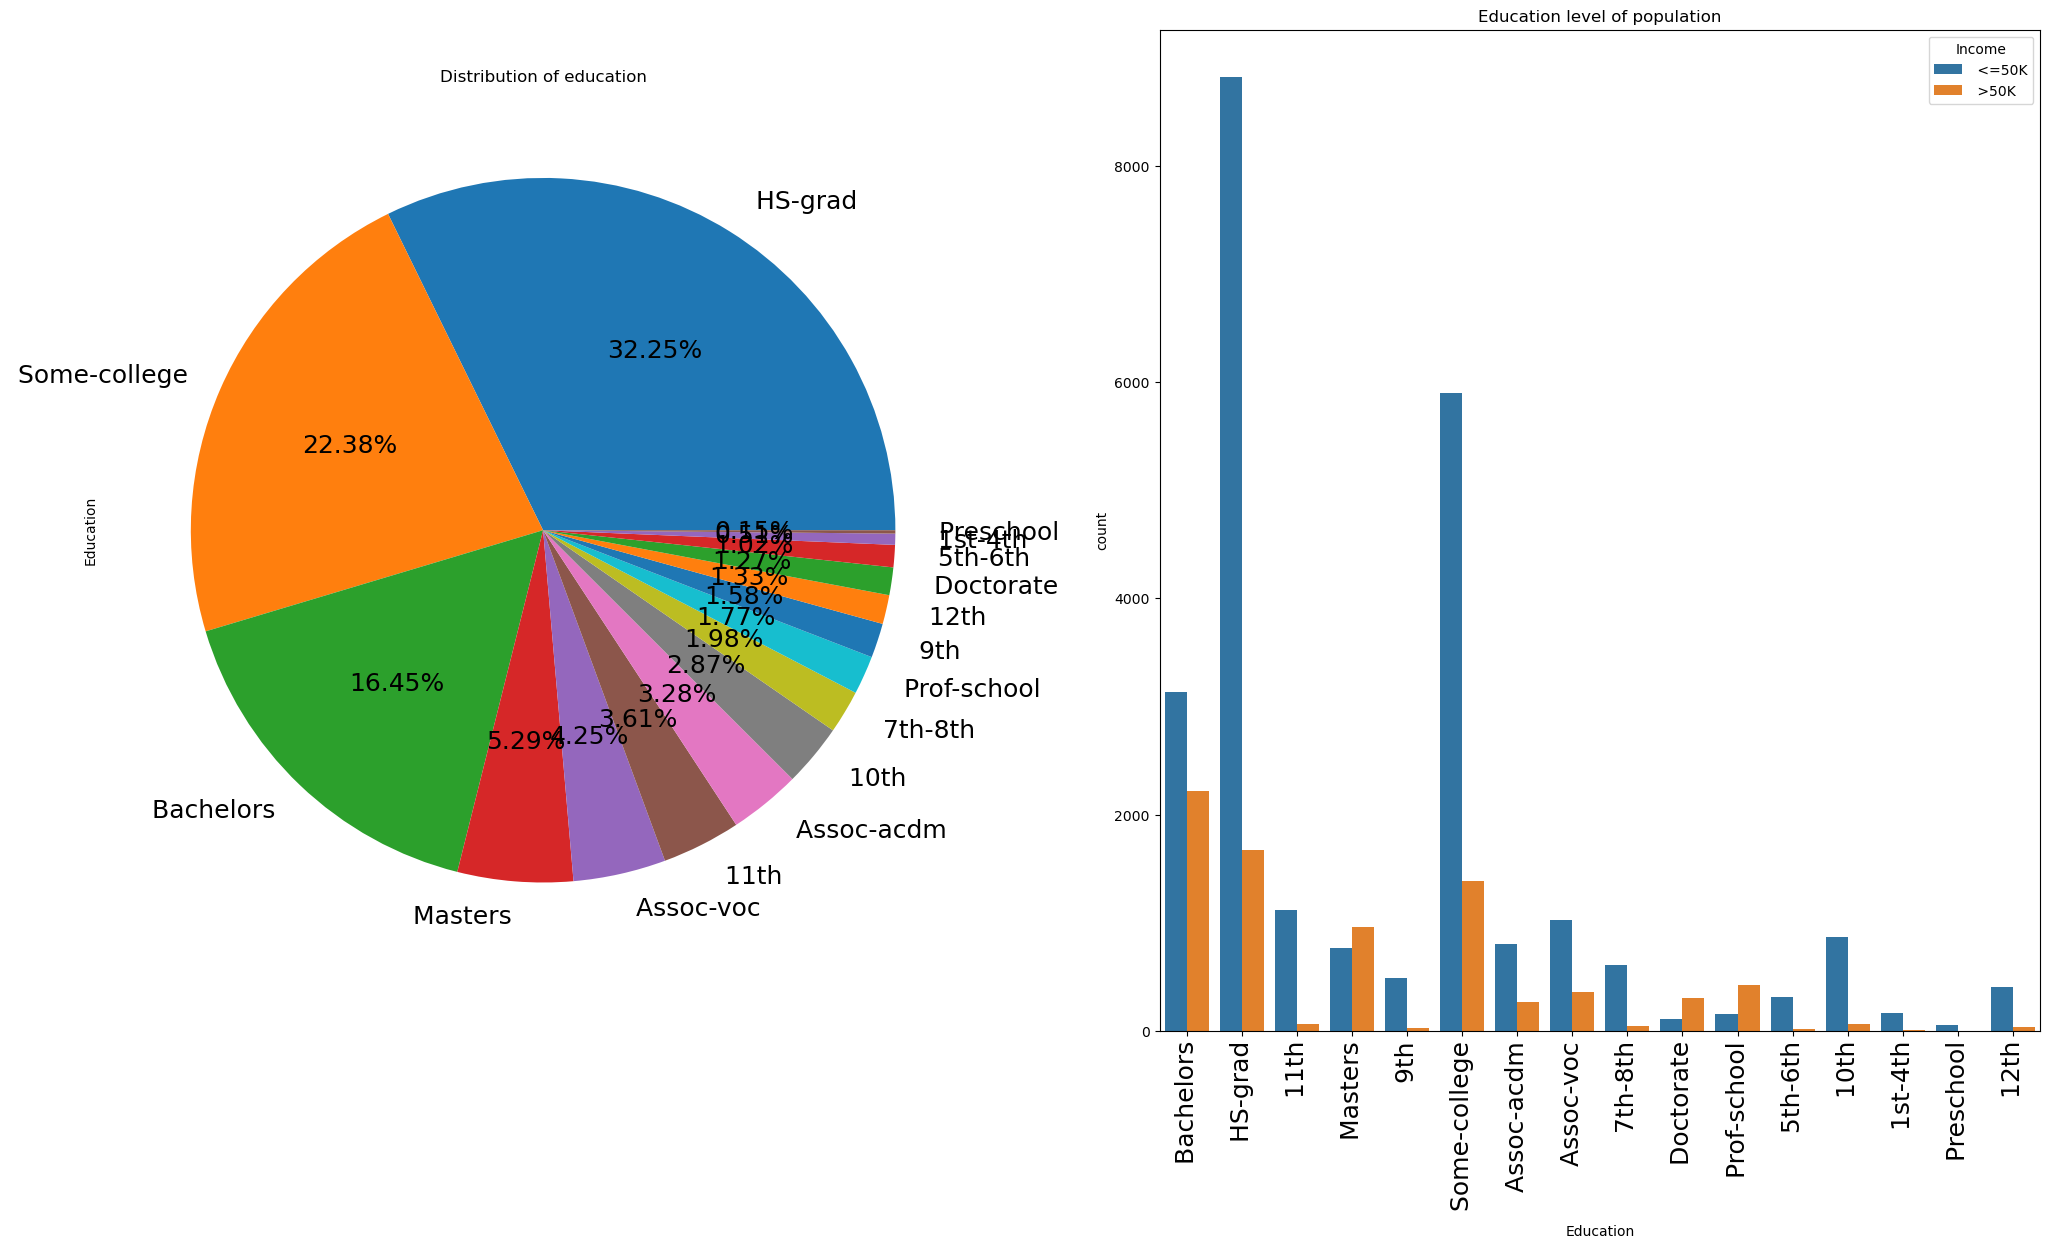

In [30]:
print(pd.crosstab(df['Education'],df['Income'],margins=True))
figure,axx = plt.subplots(1,2,figsize=(25,13))

sns.countplot(x = df['Education'], hue=df['Income'],ax=axx[1])
axx[1].set_title('Education level of population')

df['Education'].value_counts().plot(kind='pie',ax=axx[0],fontsize=18 , autopct='%.2f%%')
axx[0].set_title('Distribution of education')

plt.xticks(rotation=90 , fontsize=18)
plt.show()

- 32.28% of population got HS-gard education
- more than 50% of population got high level education
- 30% of population have Bachelors Degree and income > 50K
- 55 % of population with masters education level have income > 50K

Income                   <=50K   >50K    All
Marital_status                              
 Divorced                 3978    463   4441
 Married-AF-spouse          13     10     23
 Married-civ-spouse       8280   6690  14970
 Married-spouse-absent     384     34    418
 Never-married           10175    491  10666
 Separated                 959     66   1025
 Widowed                   908     85    993
All                      24697   7839  32536


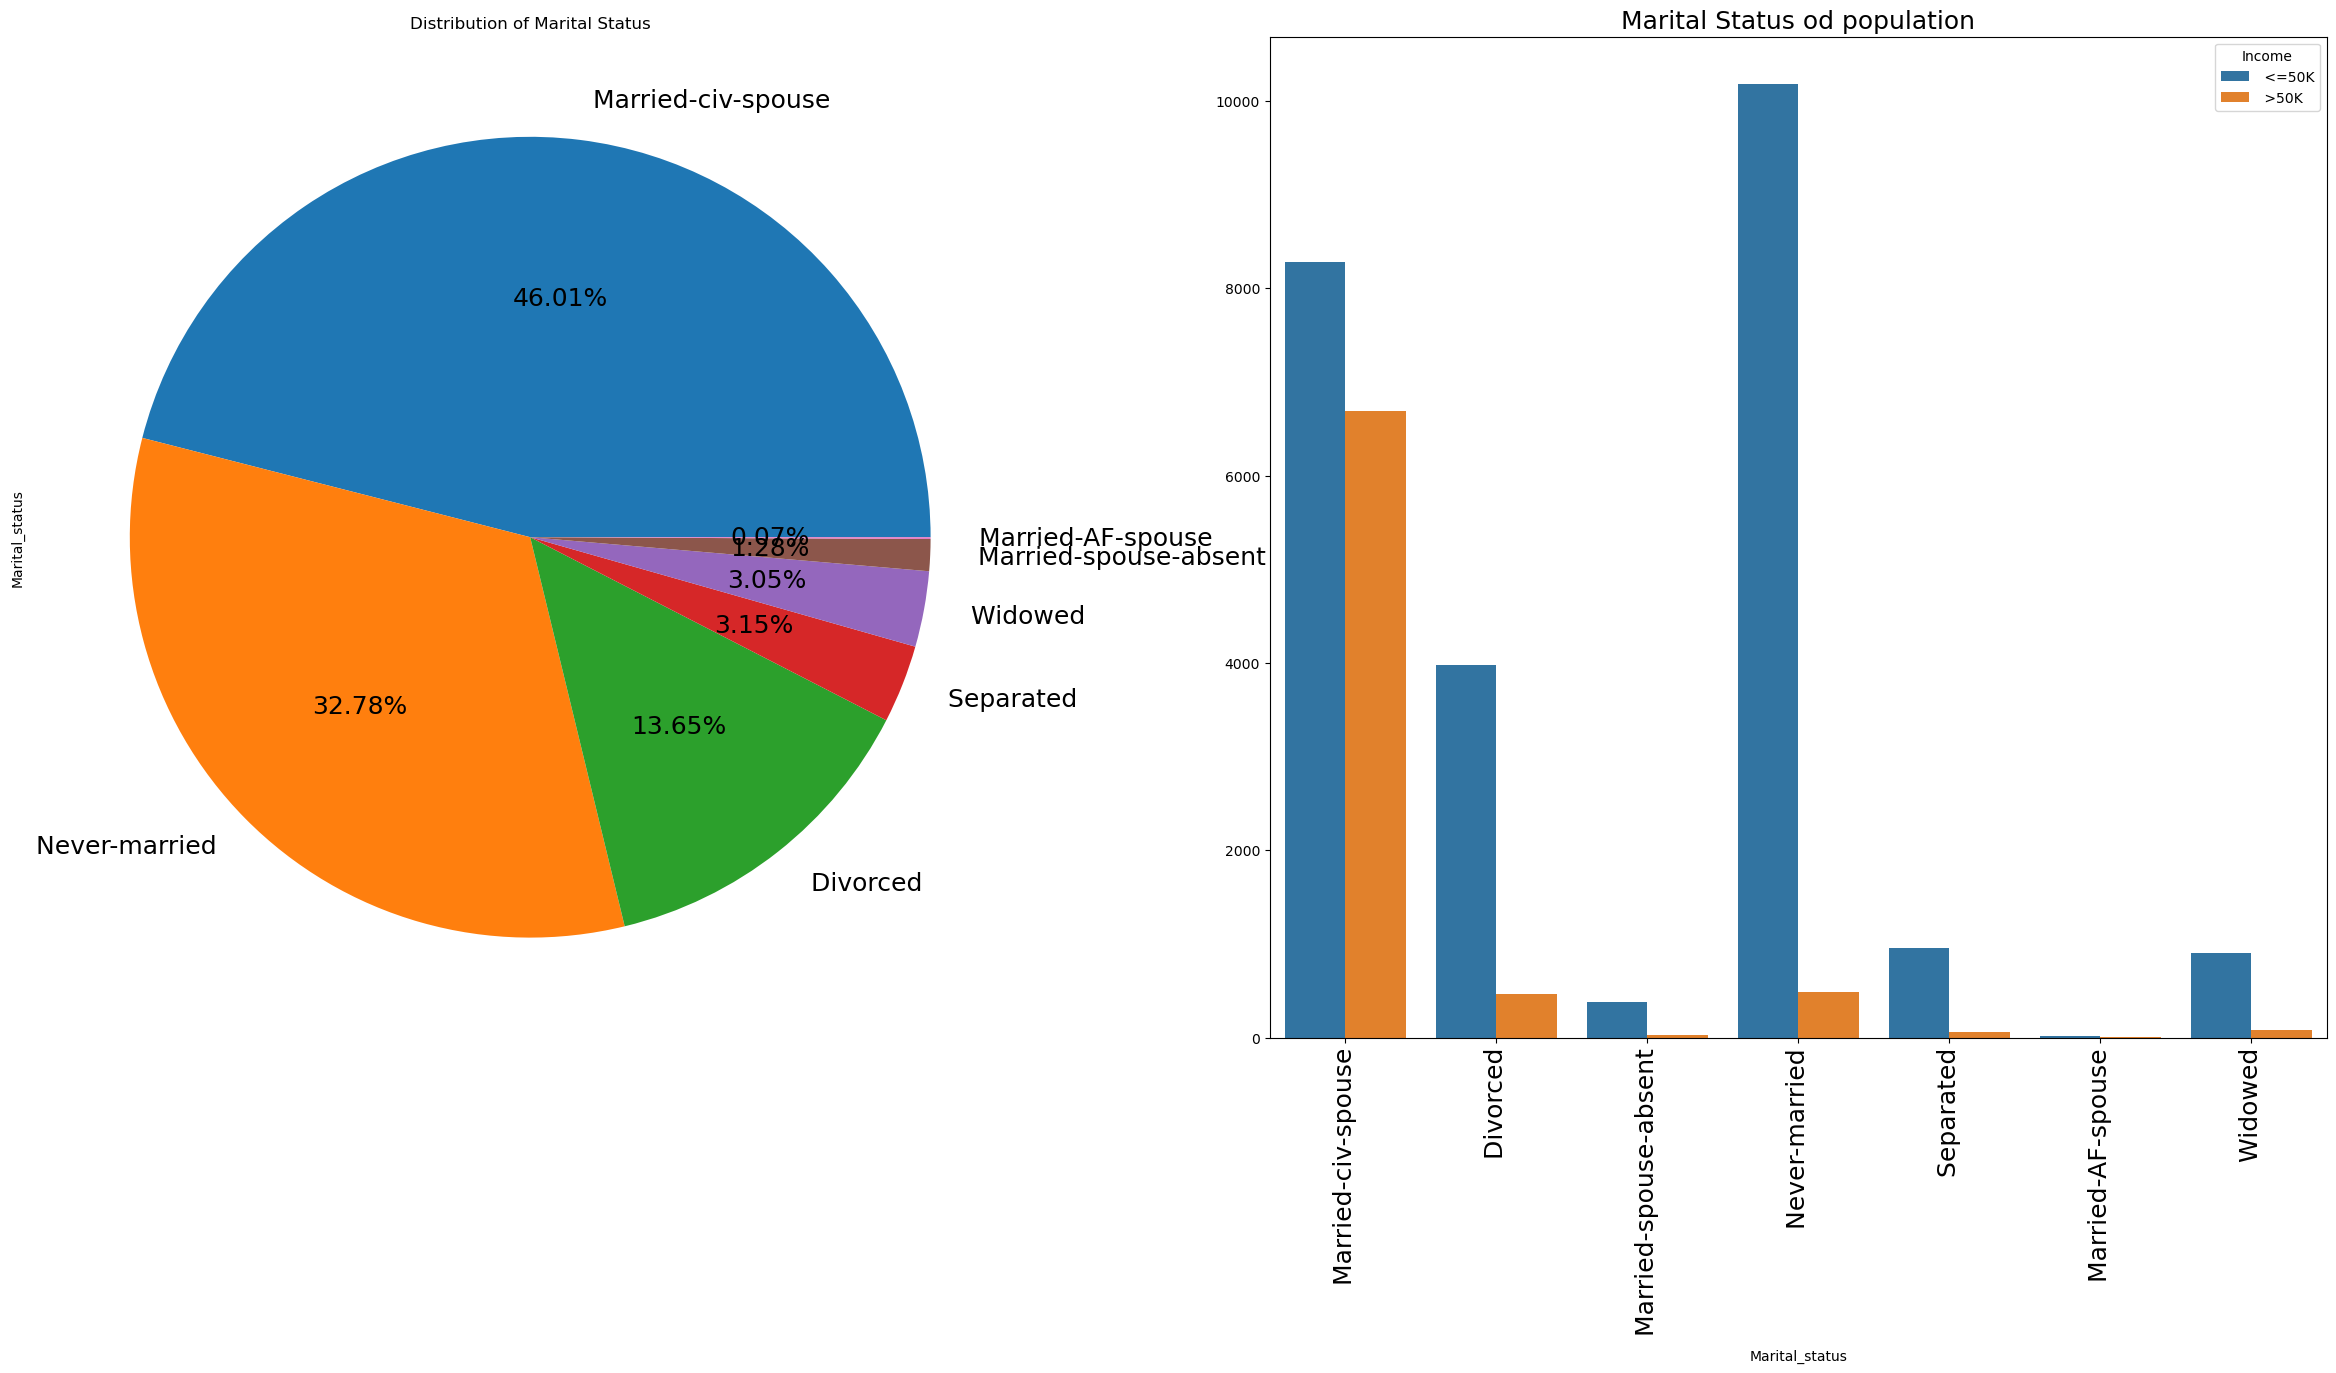

In [31]:
print(pd.crosstab(df['Marital_status'],df['Income'],margins=True))
figure , axx = plt.subplots(1,2,figsize=(30,13))

sns.countplot(x =df['Marital_status'], hue=df['Income'] , ax=axx[1])
axx[1].set_title('Marital Status od population' , fontsize=18)
axx[1].set_ylabel('') # to remove count name

df['Marital_status'].value_counts().plot(kind='pie',ax = axx[0] , fontsize=18 , autopct='%.2f%%')
axx[0].set_title('Distribution of Marital Status')

plt.xticks(rotation=90 , fontsize=18)
plt.show()

- 46% of population are engaged
- 13.65 % are divorced
- 90 % of single marital population earn <= 50K per year
- 43 % of engaged marital population earn <= 50K per year 
- 90 % of who are divorced earn <= 50K per year
- more than 75 % of population earn less than 50K per year

Income               <=50K   >50K    All
Occupation                              
 Adm-clerical         3260    507   3767
 Armed-Forces            8      1      9
 Craft-repair         3165    929   4094
 Exec-managerial      2097   1968   4065
 Farming-fishing       877    115    992
 Handlers-cleaners    1283     86   1369
 Machine-op-inspct    1751    249   2000
 Other-service        3154    137   3291
 Priv-house-serv       146      1    147
 Prof-specialty       3930   2049   5979
 Protective-serv       438    211    649
 Sales                2667    983   3650
 Tech-support          644    283    927
 Transport-moving     1277    320   1597
All                  24697   7839  32536


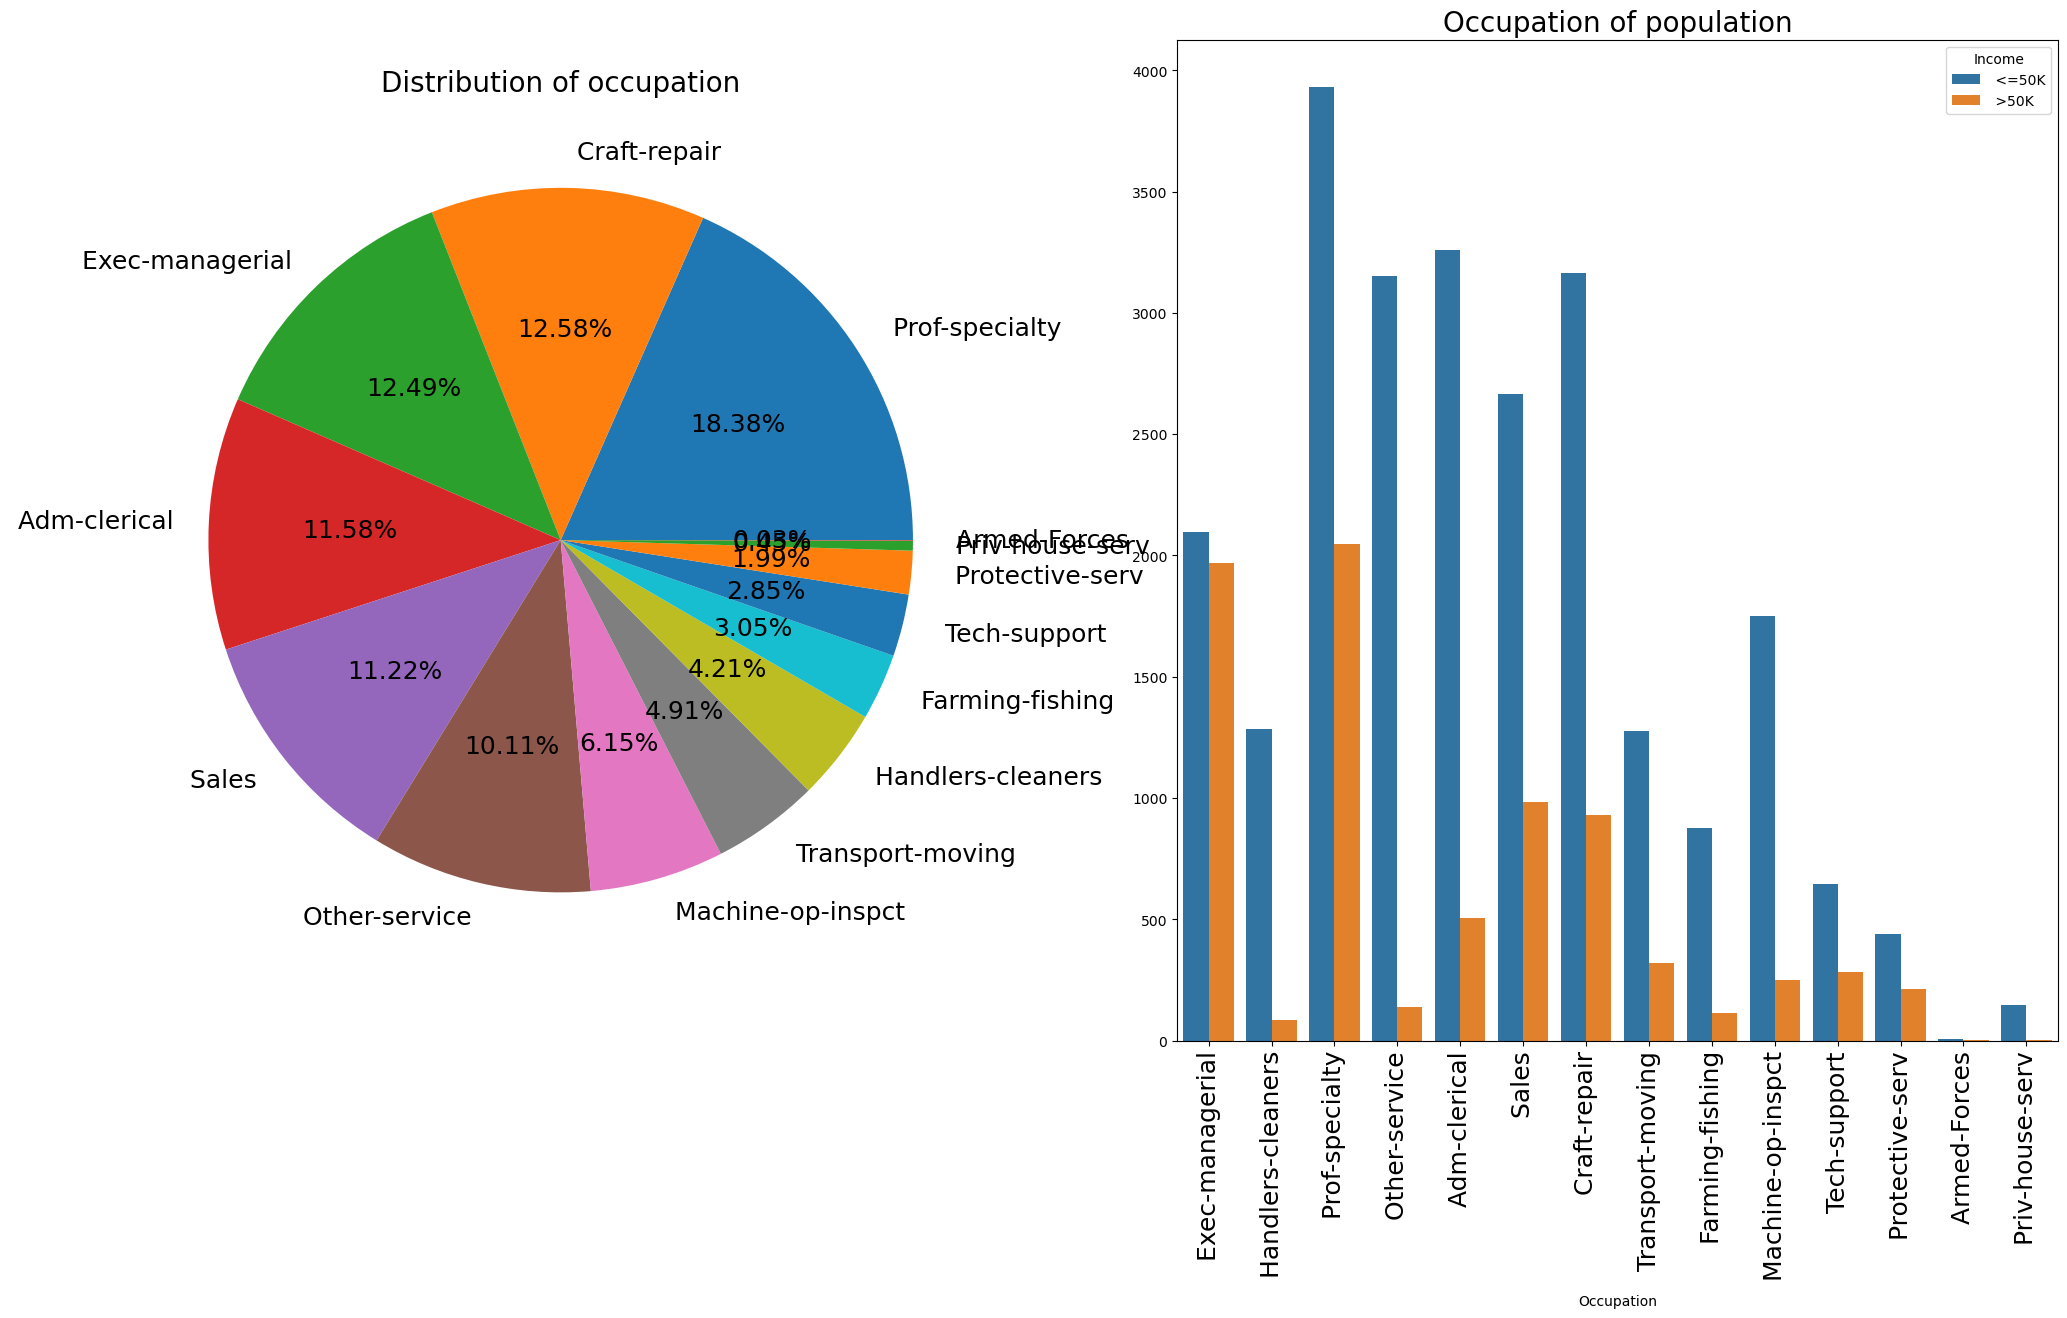

In [32]:
print(pd.crosstab(df['Occupation'],df['Income'],margins=True))
fig , axx = plt.subplots(1,2,figsize=(25,13))

sns.countplot(x= df['Occupation'] , hue= df['Income'] ,ax=axx[1] )
axx[1].set_title('Occupation of population' ,fontsize=20)
axx[1].set_ylabel('')

df['Occupation'].value_counts().plot(kind='pie', ax=axx[0] , fontsize=18 , autopct='%.2f%%')
axx[0].set_title('Distribution of occupation' ,fontsize=20)
axx[0].set_ylabel('')
plt.xticks(rotation=90 , fontsize=18)
plt.show()

- Exec-managerial are closely equally earn <= 50K and >50K
- Except Exec-managerial and Prof-speciality all other jobs are very less earning more than 50K
- more than 65 % of people who are working as Prof-speciality earn more than 50K per year
- more than 50 % of sales job are earning less than 50K per year
- one person working as Priv-house-serv earns more than 50K per year

Income            <=50K   >50K    All
Relationship                         
 Husband           7271   5916  13187
 Not-in-family     7435    856   8291
 Other-relative     944     37    981
 Own-child         4997     67   5064
 Unmarried         3227    218   3445
 Wife               823    745   1568
All               24697   7839  32536


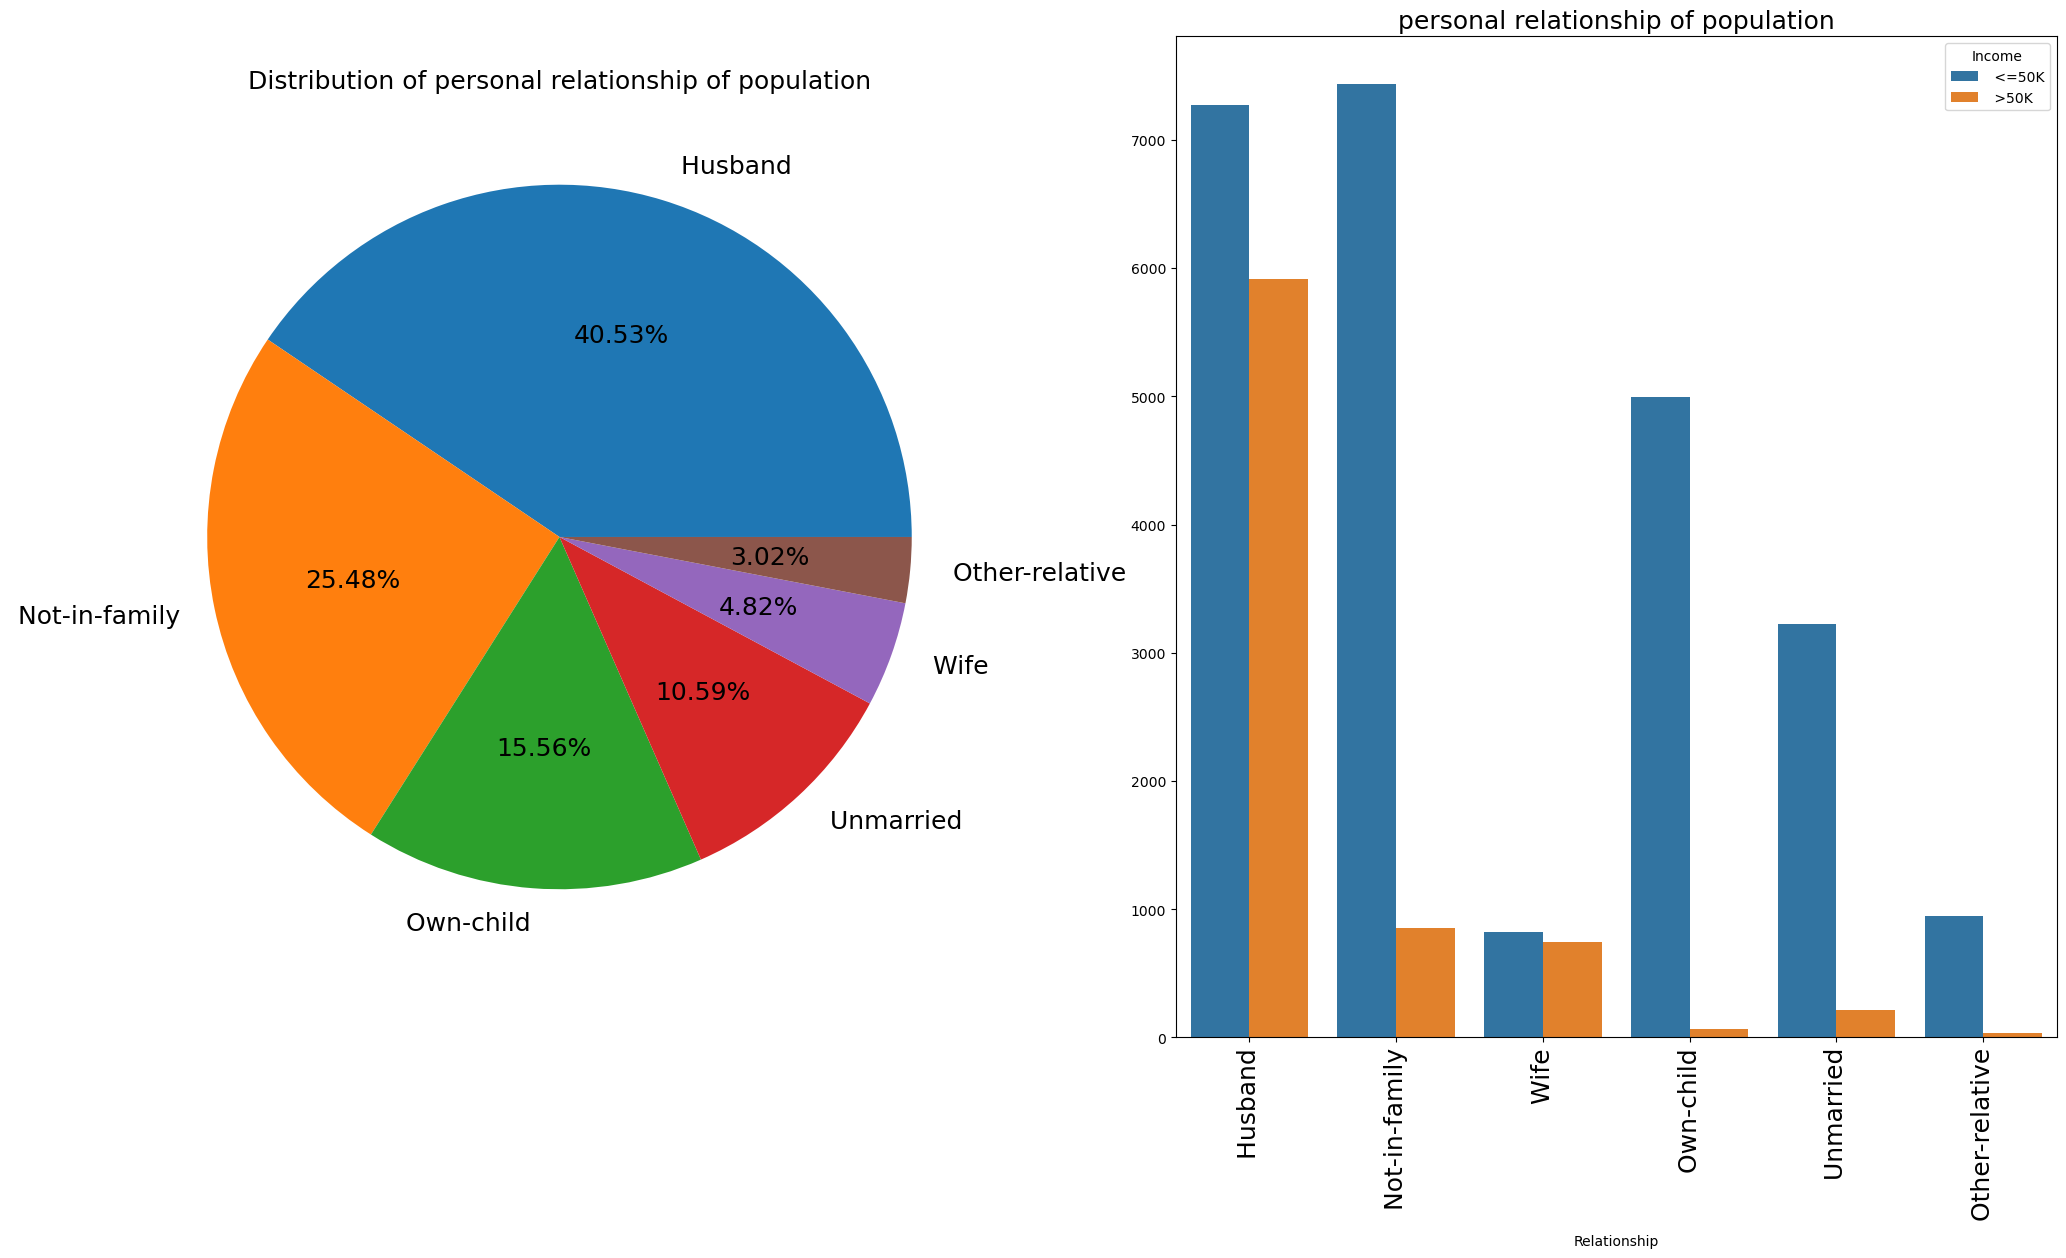

In [33]:
print(pd.crosstab(df['Relationship'],df['Income'],margins=True))
fig,axx = plt.subplots(1,2,figsize=(25,13))

sns.countplot(x=df['Relationship'] , hue=df['Income'] , ax=axx[1])
axx[1].set_title('personal relationship of population' , fontsize=18)
axx[1].set_ylabel('')

df['Relationship'].value_counts().plot(kind='pie' , ax=axx[0],fontsize=18 , autopct='%.2f%%')
axx[0].set_title('Distribution of personal relationship of population' , fontsize=18)
axx[0].set_ylabel('')

plt.xticks(rotation=90 , fontsize=18)
plt.show()

- about 40.5 of population are married men
- about 25.48% of population are not in family and 10% are single
- Husbands are equally earn <=50K and >50K per year
- wives are equally earn <=50K and >50K per year
- The majority of people aho are not in family earn less than 50K and the very less earn more than 50K
- The vast majority of people aho are hving one child earn less than 50K and the very less earn more than 50K
- the vey less unmarried earn more than 50K
- the vast majorityrelatives for all families earn less than 50K

Income                <=50K   >50K    All
Race                                     
 Amer-Indian-Eskimo     275     36    311
 Asian-Pac-Islander     762    276   1038
 Black                 2735    387   3122
 Other                  246     25    271
 White                20679   7115  27794
All                   24697   7839  32536


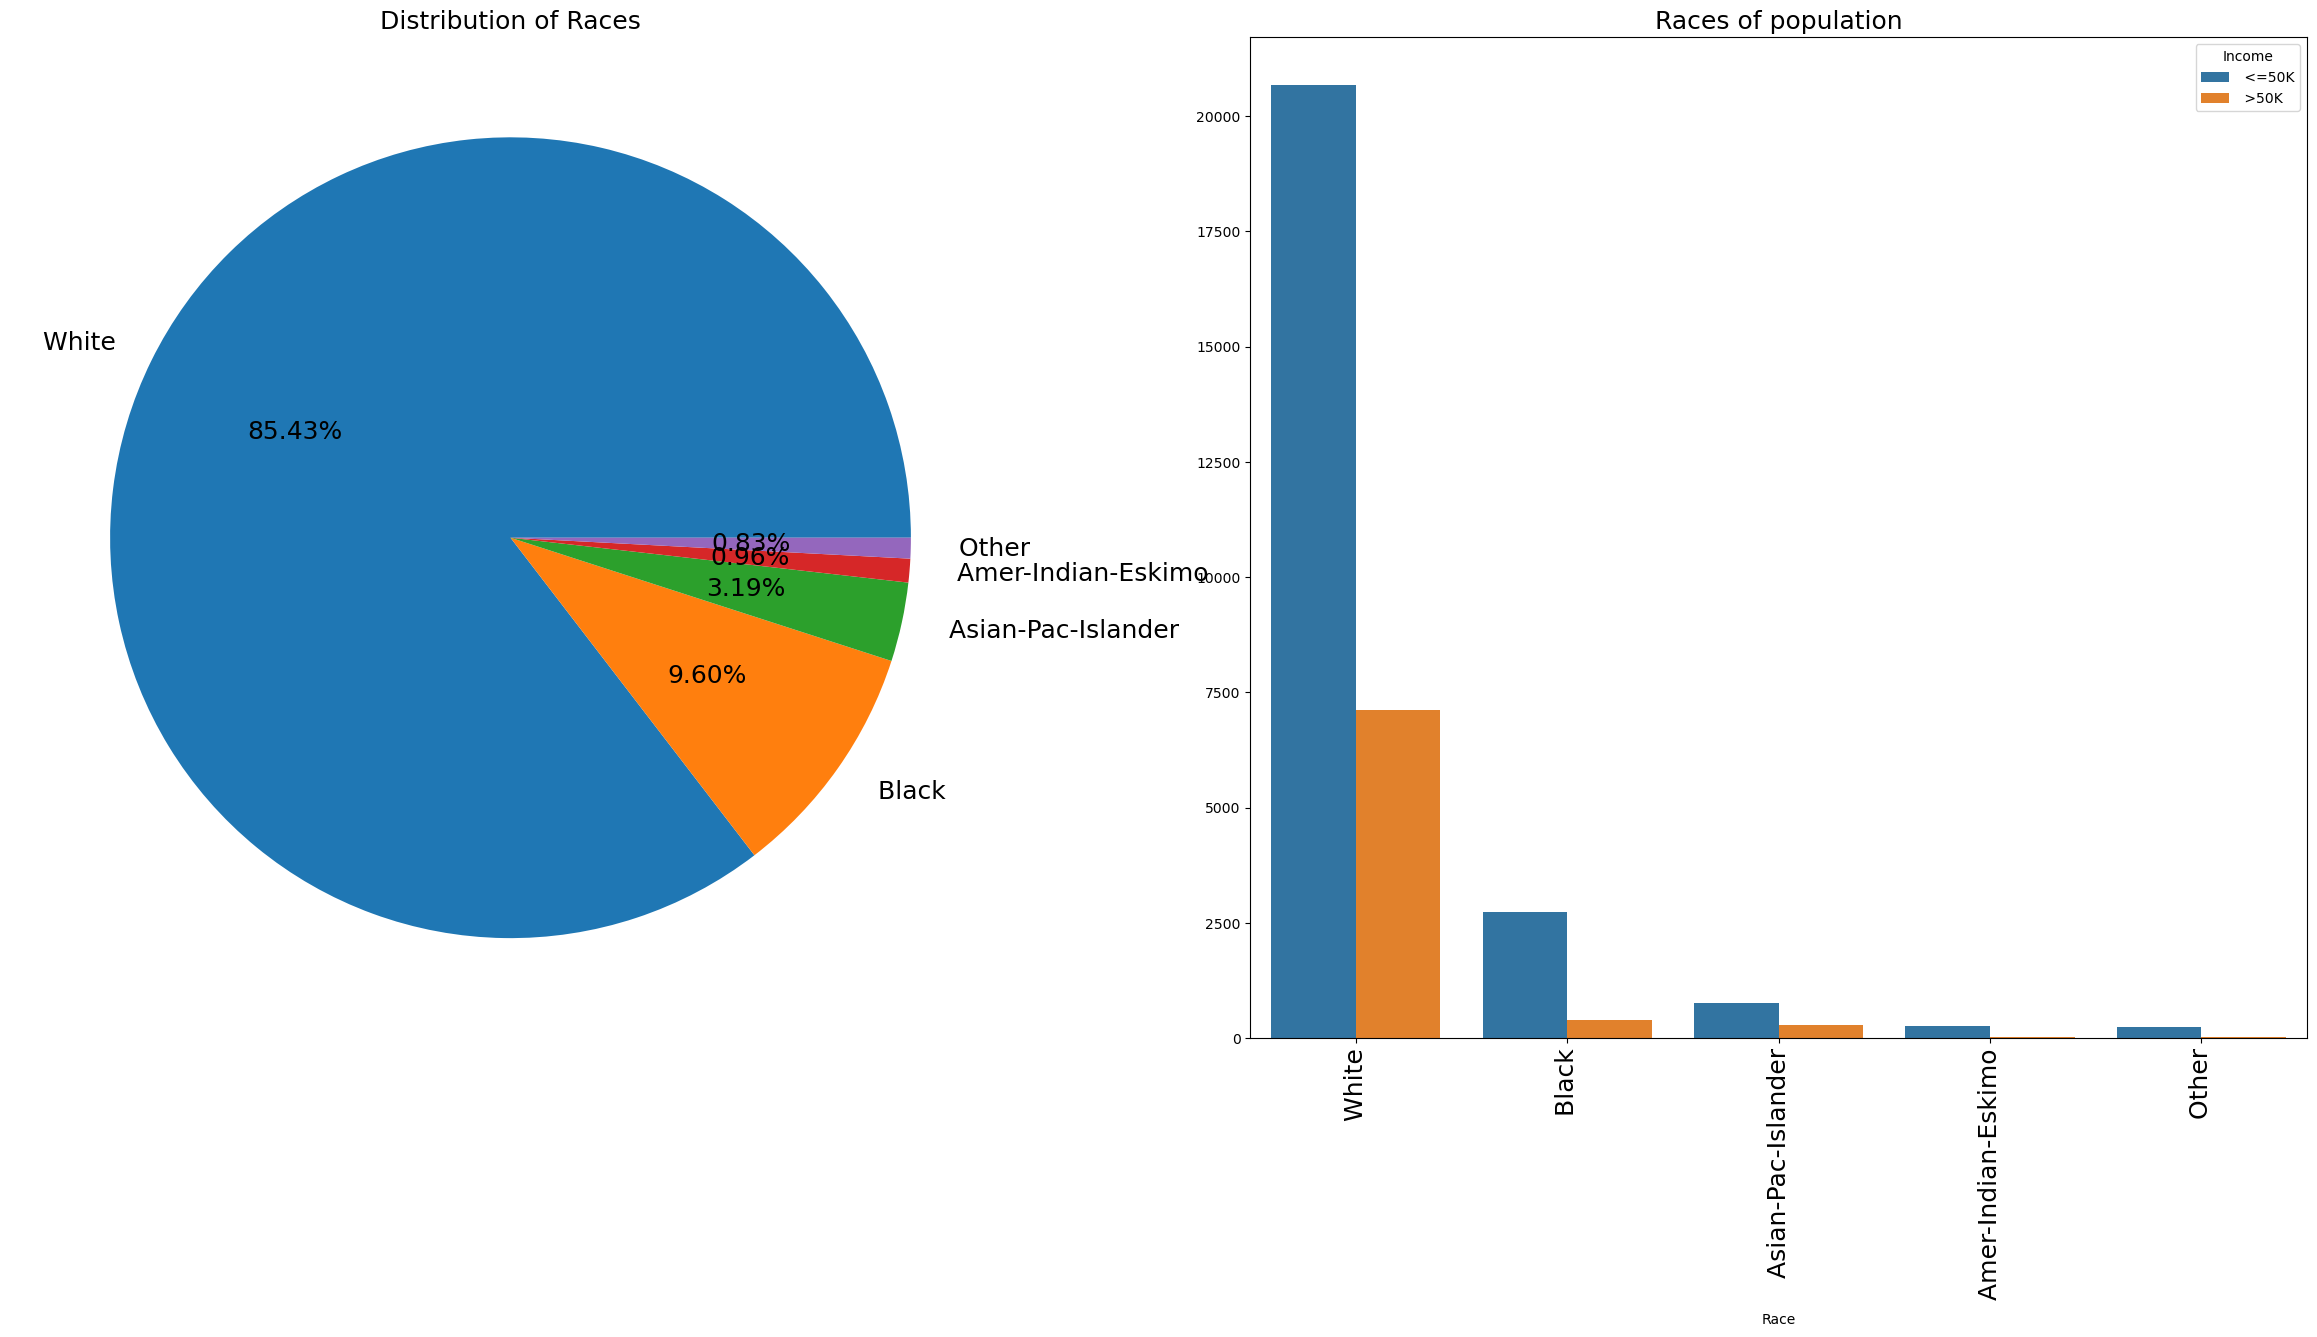

In [34]:
print(pd.crosstab(df['Race'],df['Income'],margins=True))
fig,axx = plt.subplots(1,2,figsize=(30,13))

sns.countplot(x=df['Race'] , hue=df['Income'] , ax=axx[1])
axx[1].set_title('Races of population' , fontsize=18)
axx[1].set_ylabel('')

df['Race'].value_counts().plot(kind='pie' , ax=axx[0],fontsize=18 , autopct='%.2f%%')
axx[0].set_title('Distribution of Races' , fontsize=18)
axx[0].set_ylabel('')

plt.xticks(rotation=90 , fontsize=18)
plt.show()

- 85.43 % of population are white and 9.60% are blacks
- %0.96 are native americans
- 88% of white people earn less than 50K per year
- very less of all other races are earning >50K

Income    <=50K   >50K    All
Sex                          
 Female    9583   1179  10762
 Male     15114   6660  21774
All       24697   7839  32536


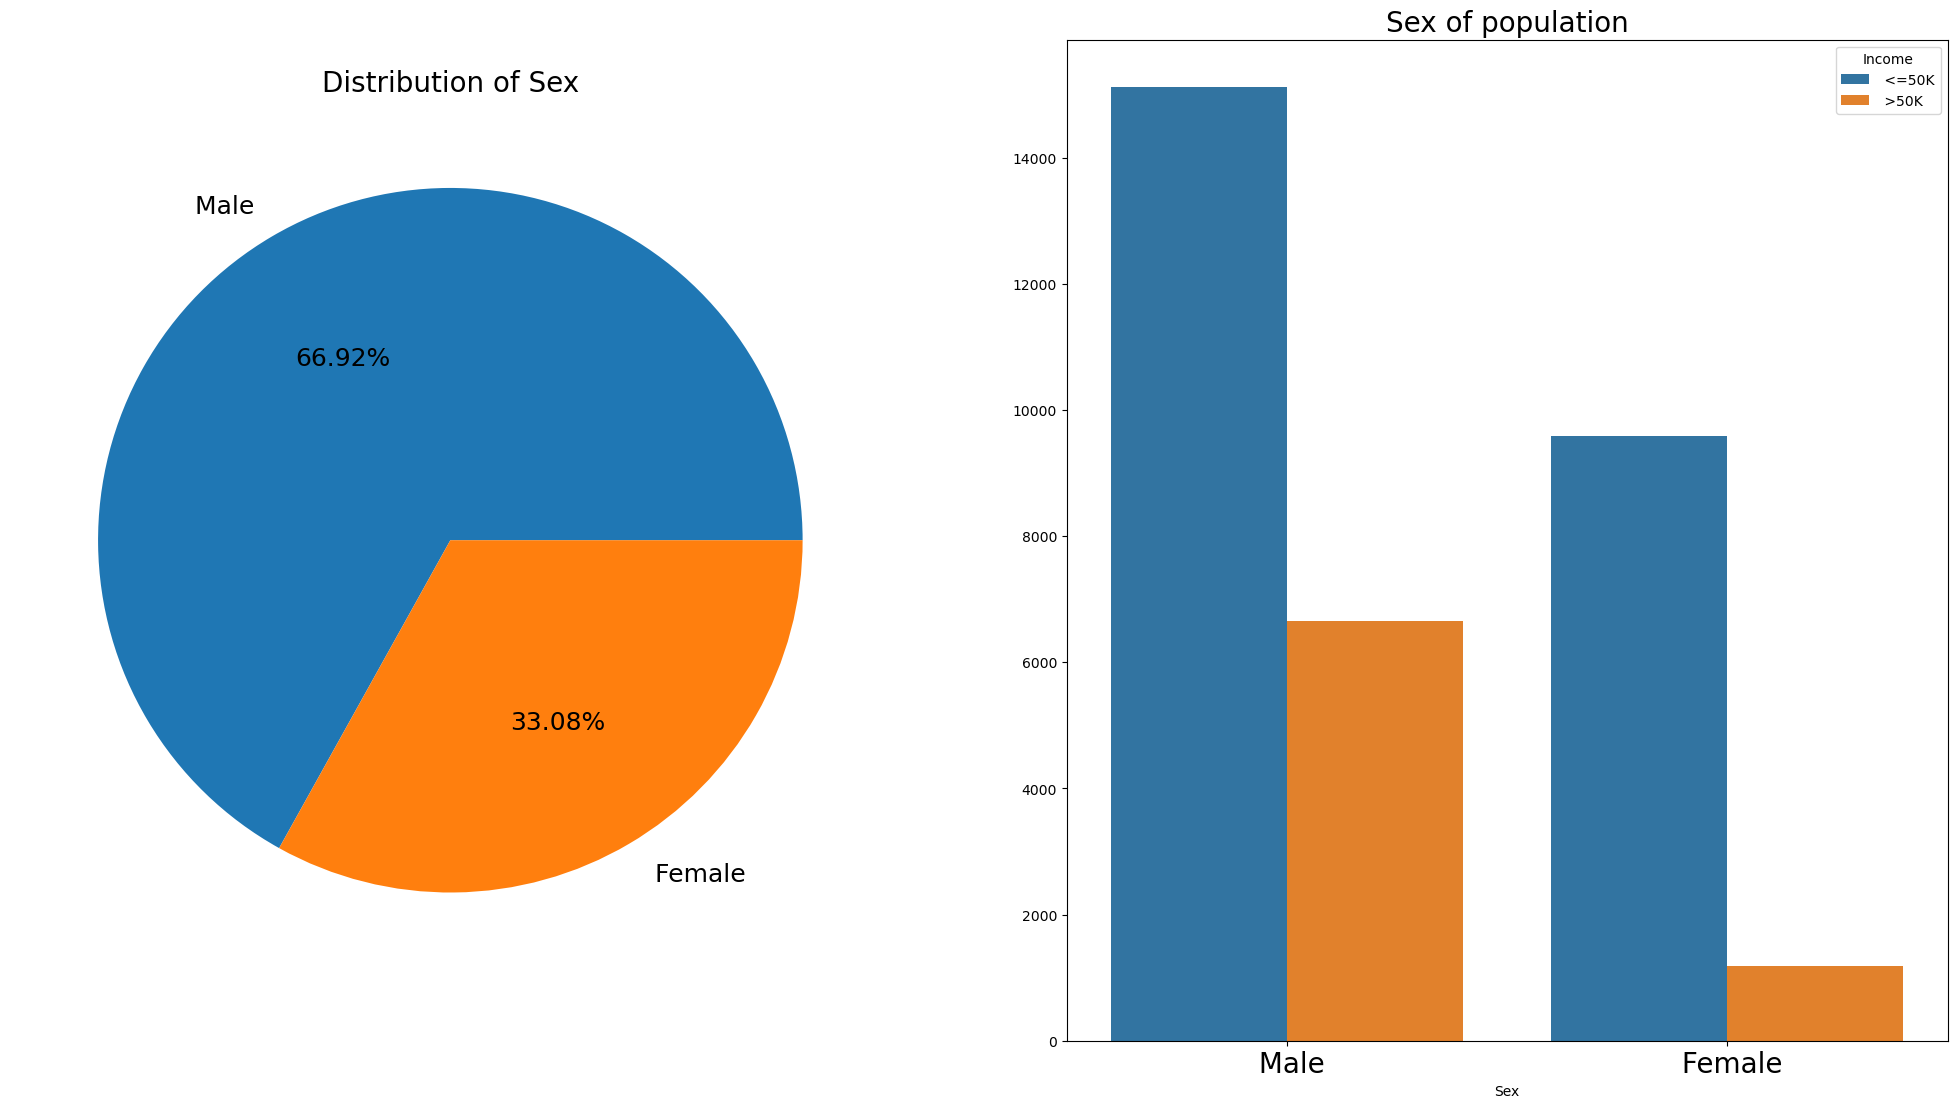

In [35]:
print(pd.crosstab(df['Sex'],df['Income'],margins=True))
fig,axx = plt.subplots(1,2,figsize=(25,13))

sns.countplot(x=df['Sex'] , hue=df['Income'] ,ax=axx[1])
axx[1].set_title('Sex of population',fontsize=20)
axx[1].set_ylabel('')

df['Sex'].value_counts().plot(kind='pie' , ax=axx[0] , fontsize=18 , autopct='%.2f%%')
axx[0].set_title('Distribution of Sex',fontsize=20)
axx[0].set_ylabel('')

plt.xticks(fontsize=20)
plt.show()

- 66.92% of population are males and 33.08% are females
- about 69% of males earn less than 50K
- 89% of females earn less than 50K and only 11% earn more than 50K
- There is no justice in the distibution of wages

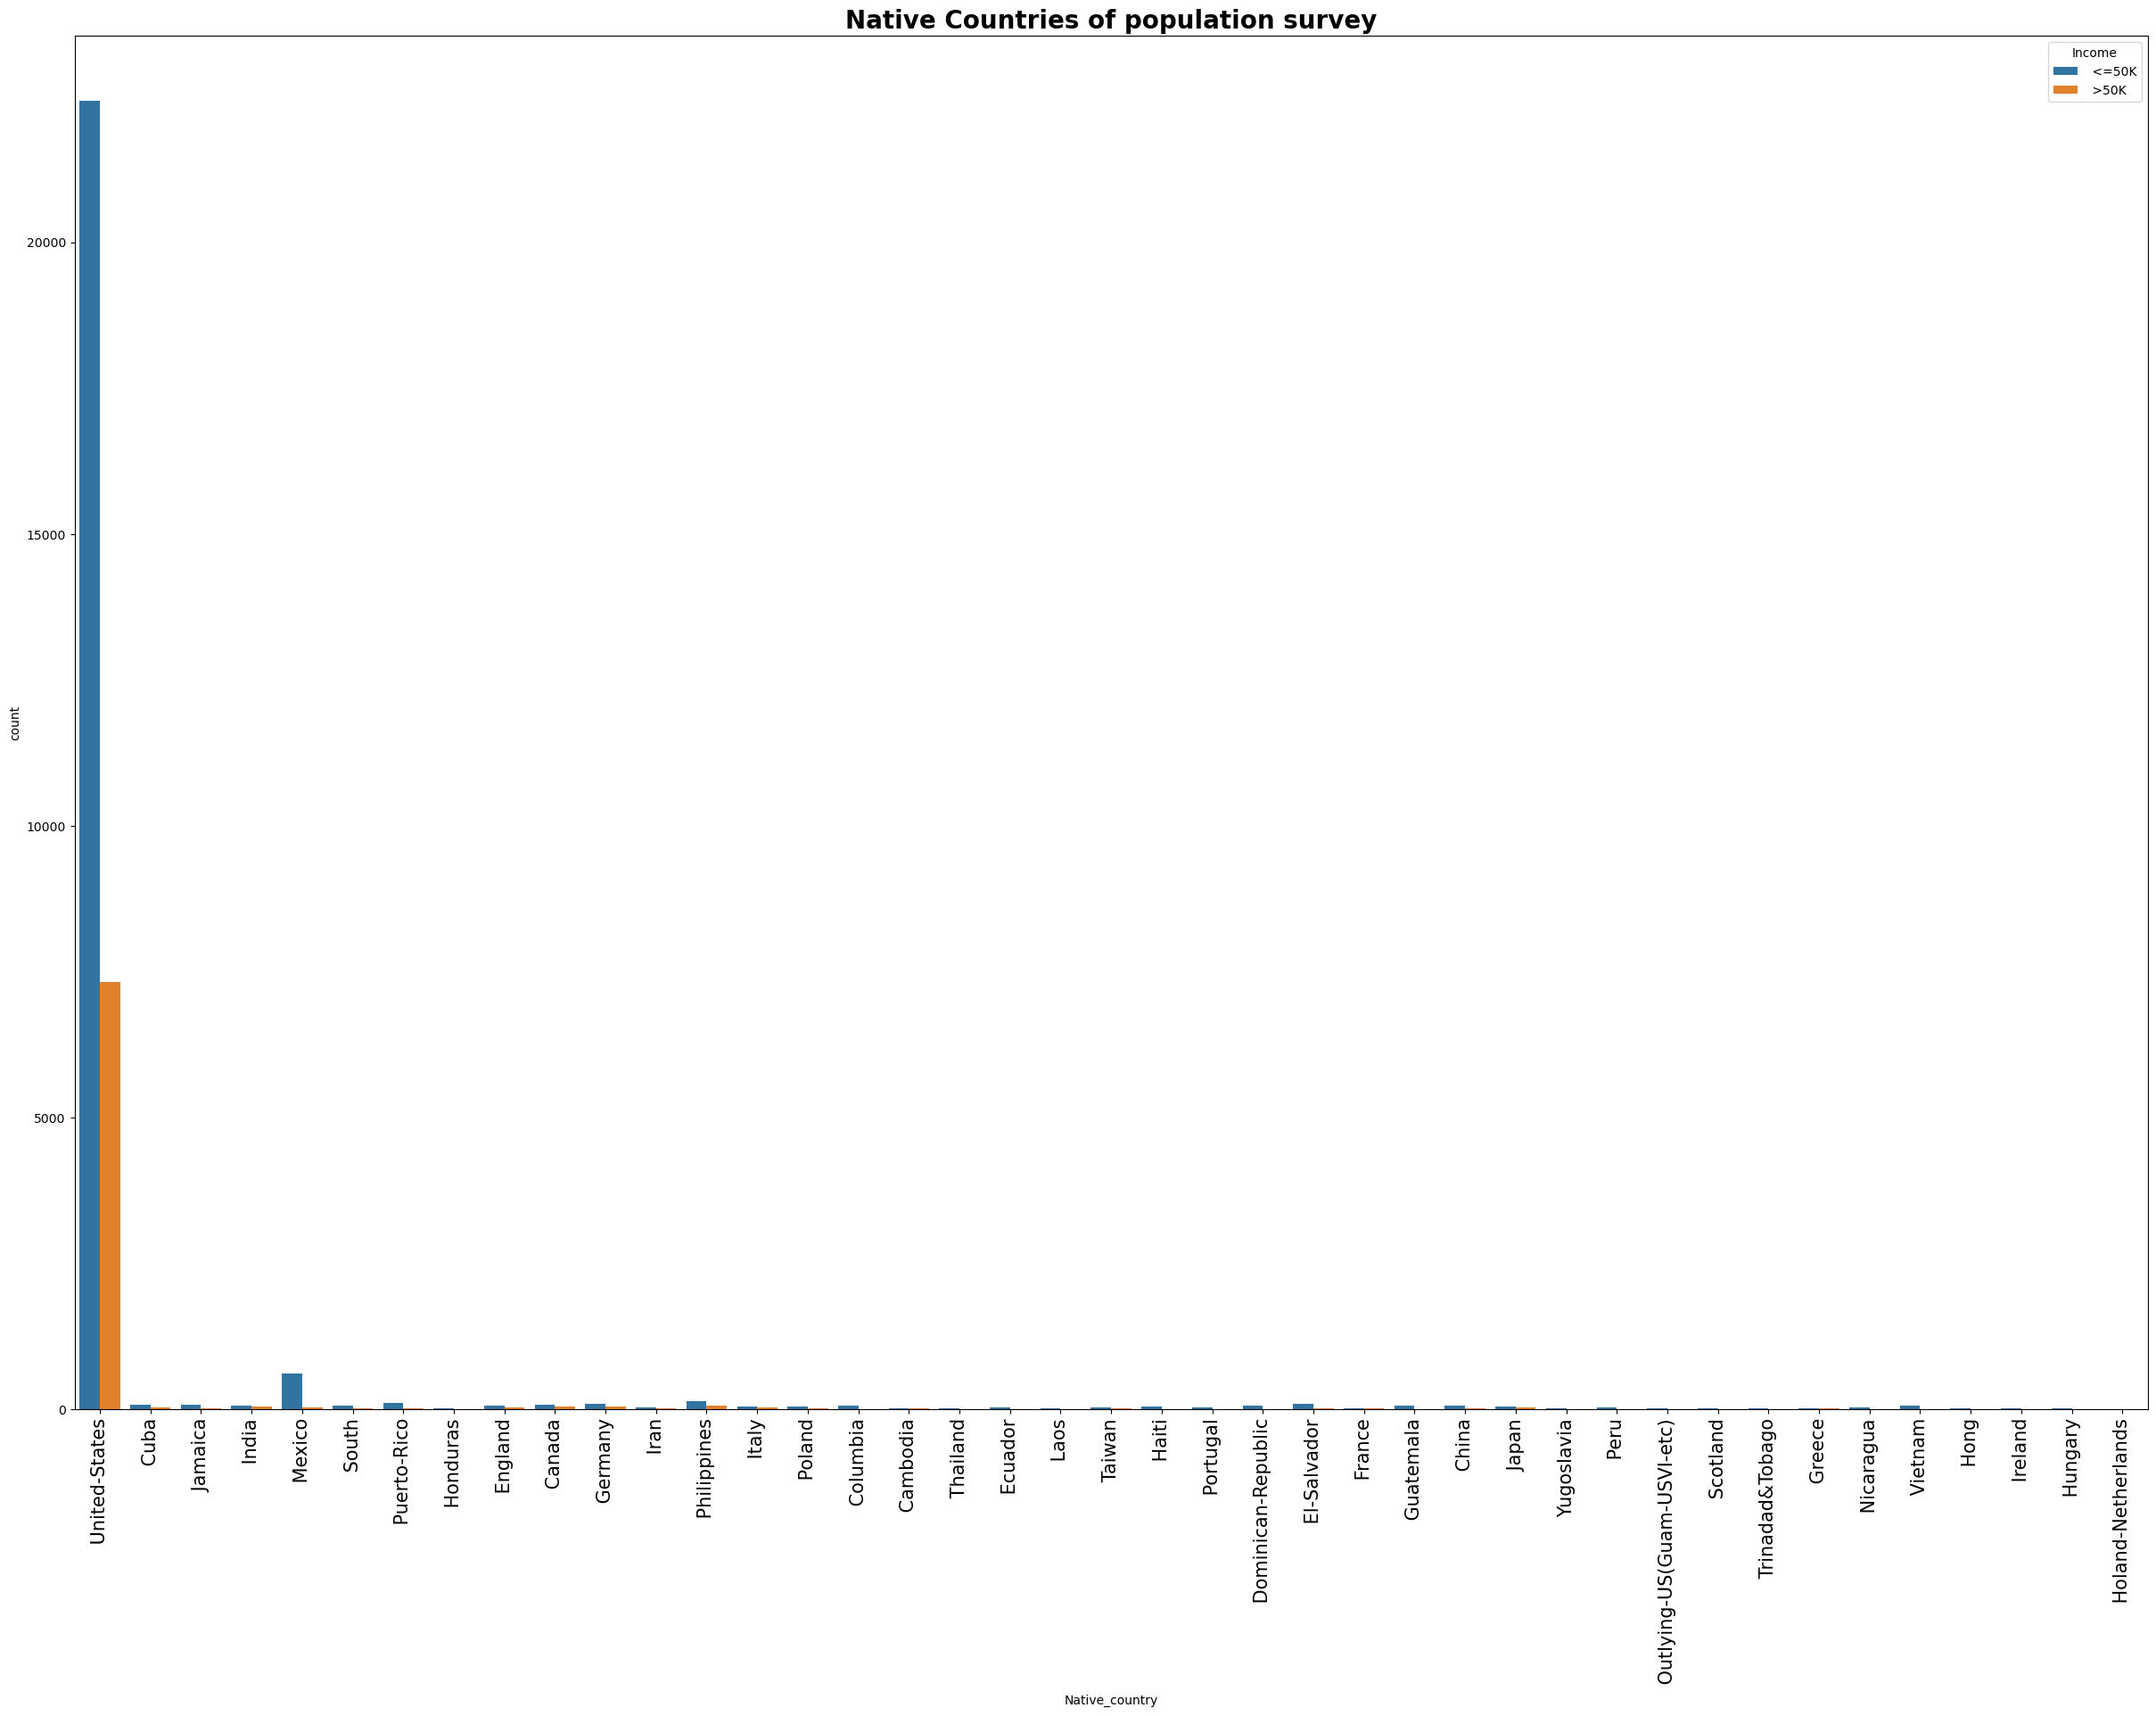

In [36]:
plt.figure(figsize=(30,20))
sns.countplot(x=df['Native_country'] , hue=df['Income'])
plt.title('Native Countries of population survey' ,fontsize=20 , fontweight='bold')
plt.xticks(fontsize=15 , rotation=90)
plt.show()

- 75% of American population earn <= 50K per year while 25% of population earn more than 50K
- the very less from other countries earn more than 50K
- qualifications and wages in United States are very high compared to other countries

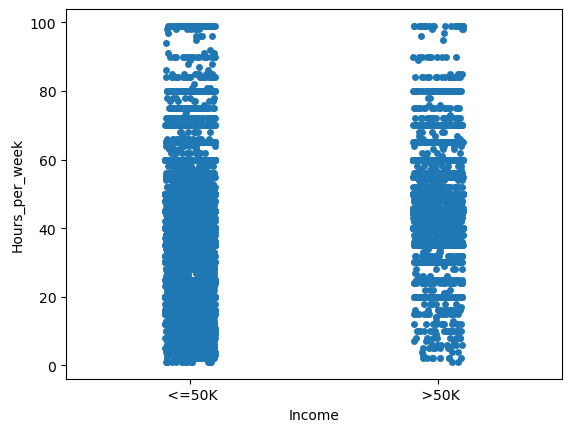

In [37]:
sns.stripplot(x=df['Income'] , y=df['Hours_per_week'])
plt.show()

- most of people who earn <= 50K work until 60 hours per week
- most of people with high wages over 50K work in range between 36 - 60 hours per week

Sex             Female   Male    All
Education                           
 10th              295    638    933
 11th              432    743   1175
 12th              144    289    433
 1st-4th            44    122    166
 5th-6th            84    248    332
 7th-8th           160    485    645
 9th               144    370    514
 Assoc-acdm        421    646   1067
 Assoc-voc         500    882   1382
 Bachelors        1618   3734   5352
 Doctorate          86    327    413
 HS-grad          3388   7106  10494
 Masters           536   1186   1722
 Preschool          16     34     50
 Prof-school        92    484    576
 Some-college     2802   4480   7282
All              10762  21774  32536


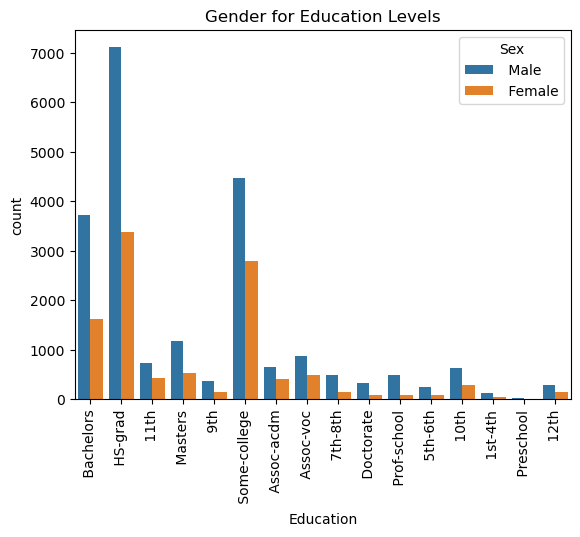

In [38]:
print(pd.crosstab(df['Education'],df['Sex'],margins=True))
sns.countplot(x=df['Education'],hue=df['Sex'])
plt.title('Gender for Education Levels')
plt.xticks(rotation=90)
plt.show()

- 70% of population having a bachelors degree are men  
- The high percent of female population have HS-grad and Some-college degree and very less in other levels
- The majority of men have HS-grad compared to other education levels

# Checking outliers

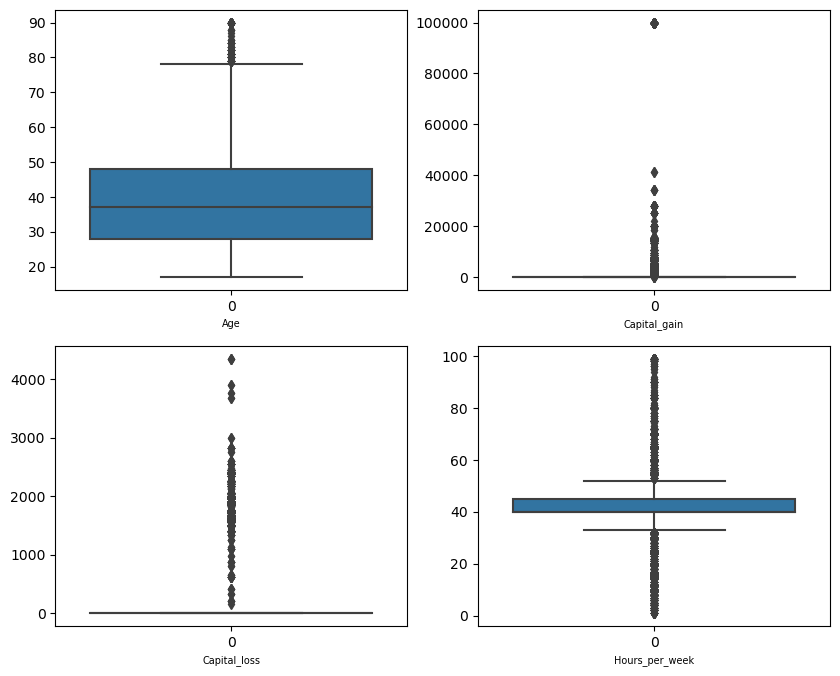

In [39]:
plt.figure(figsize=(10,8))
plot = 1
for i in num:
    if plot <=4:
        ax= plt.subplot(2,2,plot)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=7)
    plot +=1
plt.show()    

- columns Capital_gain and Capital_loss have a lot of zero numbers and higher numbers
- we need to drop outliers in all columns
- we do not have continuous data so IQR method will not work here so we will use zscore method

In [40]:
from scipy.stats import zscore

In [41]:
outliers=df[['Age','Hours_per_week','Capital_gain','Capital_loss']]
z = np.abs(zscore(outliers))

In [42]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(30333, 13)

In [43]:
print('percentage of loss = ',((df.shape[0]-df1.shape[0])/df.shape[0])*100,' %')

percentage of loss =  6.770961396606835  %


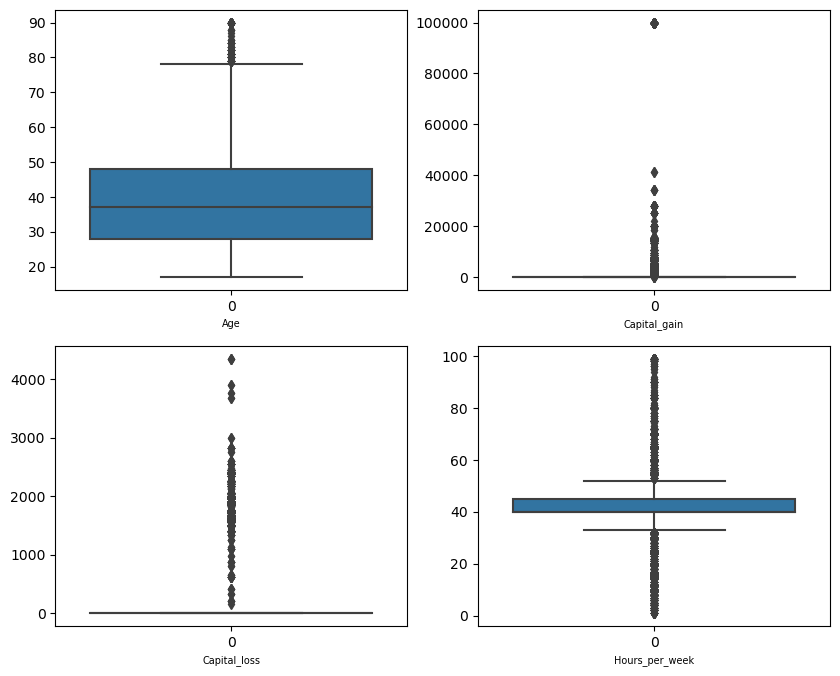

In [44]:
plt.figure(figsize=(10,8))
plot = 1
for i in num:
    if plot <=4:
        ax= plt.subplot(2,2,plot)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=7)
    plot +=1
plt.show()    

- There is no much effect on data as they are al discrete data so we can move ahead to check for skewness

# Check skewness

In [45]:
df1.skew()

Age                0.491871
Capital_gain       4.953369
Capital_loss      29.912594
Hours_per_week    -0.350470
dtype: float64

- skewness for columns Age and Hours_per_week are in limit 0.55/+0.55
- clumns Capital_gain ans Capital_loss have very much zero values more than higher number so n need to remove skewness because there will be skewness too at the end so we can move ahead with this data
- There is no continuous data to remove its skewness

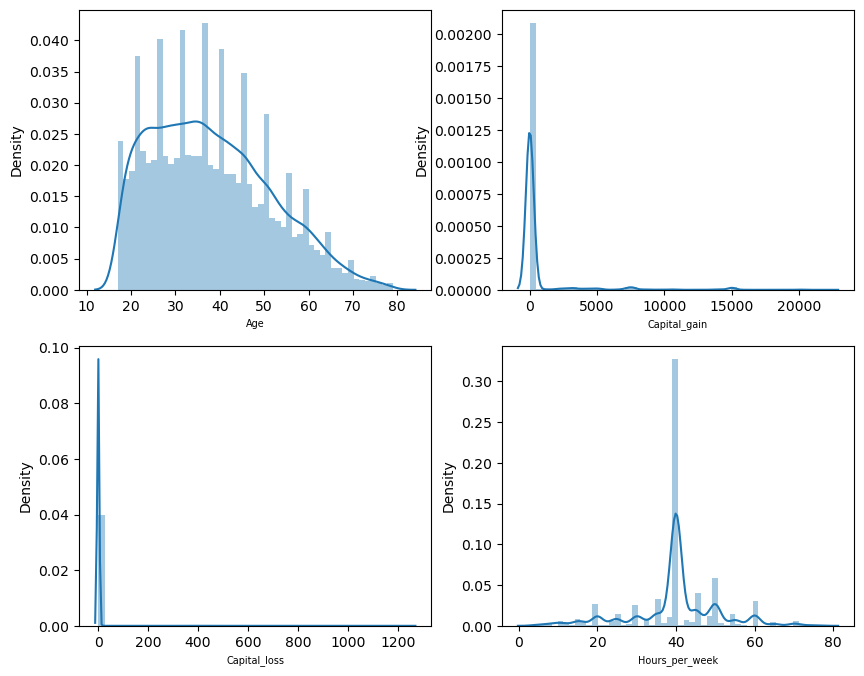

In [46]:
plt.figure(figsize=(10,8))
plot = 1
for i in num:
    if plot <=4:
        ax= plt.subplot(2,2,plot)
        sns.distplot(df1[i])
        plt.xlabel(i,fontsize=7)
    plot +=1
plt.show()    

# correlation

In [47]:
#convert categorical columns to numerical ones :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df1['Income'].value_counts()

 <=50K    23603
 >50K      6730
Name: Income, dtype: int64

In [49]:
for i in cat:
    df1[i] = le.fit_transform(df1[i])

In [50]:
df1['Income'].value_counts()

0    23603
1     6730
Name: Income, dtype: int64

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30333 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30333 non-null  int64
 1   Workclass       30333 non-null  int32
 2   Education       30333 non-null  int32
 3   Marital_status  30333 non-null  int32
 4   Occupation      30333 non-null  int32
 5   Relationship    30333 non-null  int32
 6   Race            30333 non-null  int32
 7   Sex             30333 non-null  int32
 8   Capital_gain    30333 non-null  int64
 9   Capital_loss    30333 non-null  int64
 10  Hours_per_week  30333 non-null  int64
 11  Native_country  30333 non-null  int32
 12  Income          30333 non-null  int32
dtypes: int32(9), int64(4)
memory usage: 2.2 MB


In [52]:
df1

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,2,3,0,4,1,0,0,13,37,0
1,38,3,11,0,5,1,4,1,0,0,40,37,0
2,53,3,1,2,5,0,2,1,0,0,40,37,0
3,28,3,9,2,9,5,2,0,0,0,40,4,0
4,37,3,12,2,3,5,4,0,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,2,12,5,4,0,0,0,38,37,0
32556,40,3,11,2,6,0,4,1,0,0,40,37,1
32557,58,3,11,6,0,4,4,0,0,0,40,37,0
32558,22,3,11,4,0,3,4,1,0,0,20,37,0


In [53]:
df1.corr()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032182,-0.011794,-0.283609,-0.001868,-0.266243,0.025301,0.085756,0.129276,0.020594,0.089197,-0.002529,0.236670
Workclass,0.032182,1.000000,0.002690,-0.015758,0.009005,-0.057562,0.046424,0.068622,0.011832,-0.010029,0.027099,-0.001522,-0.006787
Education,-0.011794,0.002690,1.000000,-0.036147,-0.042622,-0.009003,0.015572,-0.031604,0.027592,-0.000593,0.057314,0.079134,0.074659
Marital_status,-0.283609,-0.015758,-0.036147,1.000000,0.035028,0.184996,-0.066529,-0.123839,-0.068496,-0.013776,-0.194635,-0.020436,-0.194715
Occupation,-0.001868,0.009005,-0.042622,0.035028,1.000000,-0.036217,-0.004035,0.049196,0.009391,-0.001823,-0.023267,-0.000899,0.030457
Relationship,-0.266243,-0.057562,-0.009003,0.184996,-0.036217,1.000000,-0.116809,-0.576943,-0.089092,0.028606,-0.255811,-0.010390,-0.245502
Race,0.025301,0.046424,0.015572,-0.066529,-0.004035,-0.116809,1.000000,0.089210,0.023913,0.001468,0.044825,0.112025,0.072242
Sex,0.085756,0.068622,-0.031604,-0.123839,0.049196,-0.576943,0.089210,1.000000,0.070066,-0.026185,0.233351,0.001008,0.209051
Capital_gain,0.129276,0.011832,0.027592,-0.068496,0.009391,-0.089092,0.023913,0.070066,1.000000,-0.008946,0.097560,0.011404,0.343069
Capital_loss,0.020594,-0.010029,-0.000593,-0.013776,-0.001823,0.028606,0.001468,-0.026185,-0.008946,1.000000,-0.003018,0.001092,-0.016382


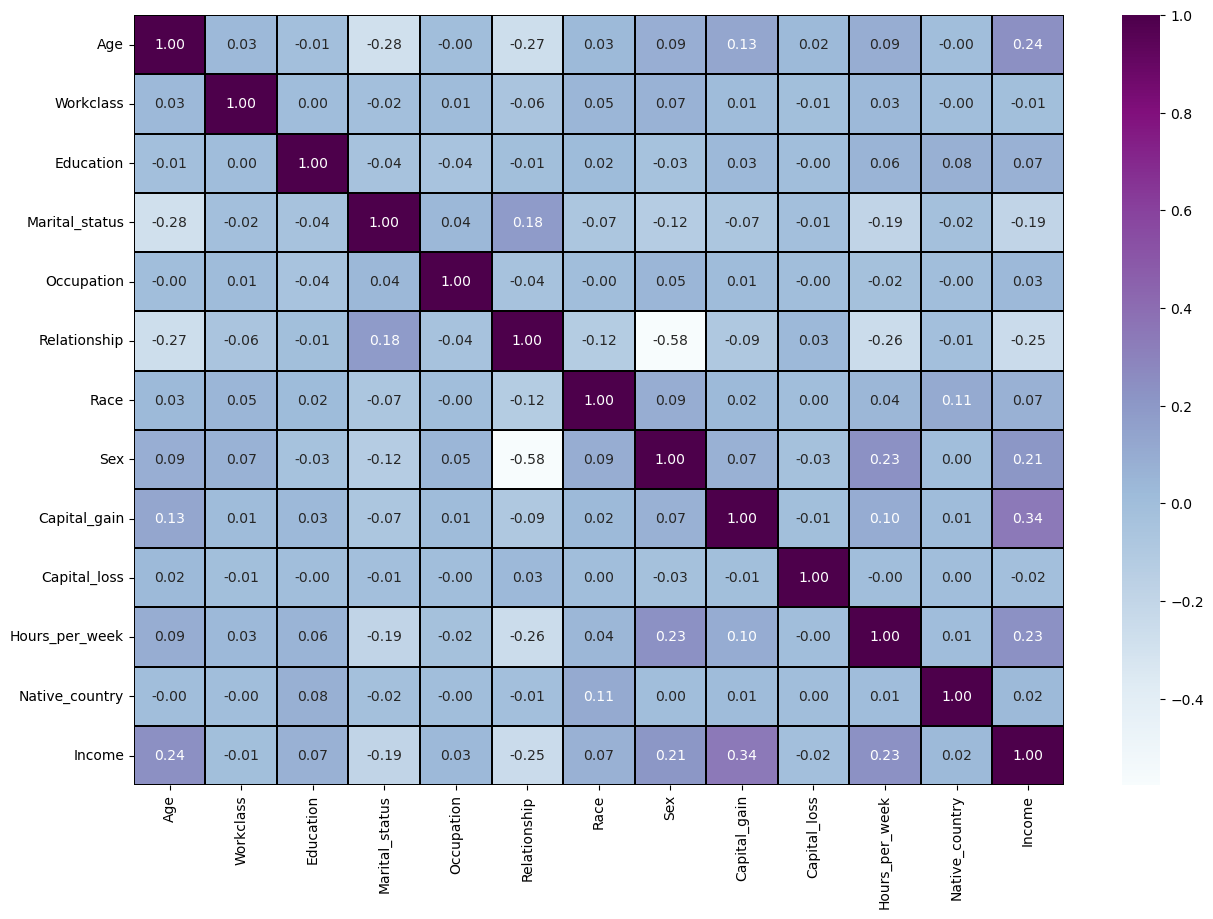

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True , linewidth=0.1 , linecolor='black',cmap='BuPu',fmt='0.2f')
plt.show()

- feature sex and relationship are highly negatively correlated
- target variable Income is moderated positively correlated with Age, Capital_gain and hours per week
- Incme is poorely correlated with Workclass,Education , Rave , Capital_loss and Native_country

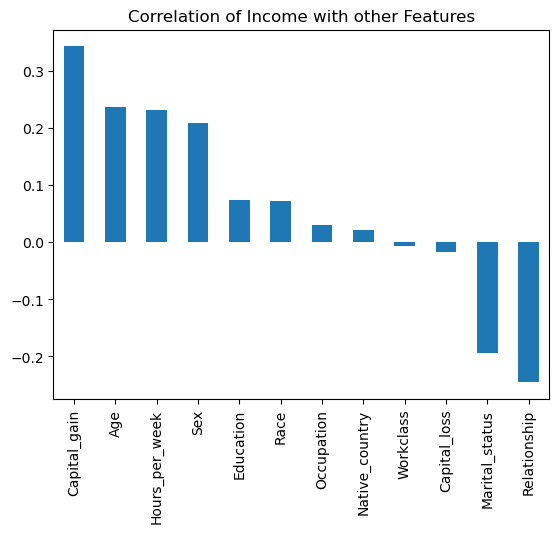

In [56]:
df1.corr()['Income'].sort_values(ascending=False).drop('Income').plot(kind='bar')
plt.title('Correlation of Income with other Features')
plt.show()

# Scaling Data

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [59]:
x= df1.drop('Income',axis=1)
y= df1['Income']
print('shape of feature = ',x.shape)
print('shape of variable = ',y.shape)

shape of feature =  (30333, 12)
shape of variable =  (30333,)


In [60]:
x_scaling = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaling , columns= x.columns)
x_scaled

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.885896,1.738949,-0.328069,-0.412425,-0.781090,-0.919234,0.397296,0.715253,-0.244025,-0.036662,-2.415054,0.265240
1,-0.011931,-0.076926,0.184859,-1.732892,-0.278698,-0.297800,0.397296,0.715253,-0.244025,-0.036662,0.010639,0.265240
2,1.110353,-0.076926,-2.379779,-0.412425,-0.278698,-0.919234,-1.947520,0.715253,-0.244025,-0.036662,0.010639,0.265240
3,-0.760120,-0.076926,-0.328069,-0.412425,0.726086,2.187937,-1.947520,-1.398108,-0.244025,-0.036662,0.010639,-5.293151
4,-0.086750,-0.076926,0.441323,-0.412425,-0.781090,2.187937,0.397296,-1.398108,-0.244025,-0.036662,0.010639,0.265240
...,...,...,...,...,...,...,...,...,...,...,...,...
30328,-0.834939,-0.076926,-0.840996,-0.412425,1.479674,2.187937,0.397296,-1.398108,-0.244025,-0.036662,-0.169042,0.265240
30329,0.137707,-0.076926,0.184859,-0.412425,-0.027502,-0.919234,0.397296,0.715253,-0.244025,-0.036662,0.010639,0.265240
30330,1.484447,-0.076926,0.184859,2.228507,-1.534678,1.566503,0.397296,-1.398108,-0.244025,-0.036662,0.010639,0.265240
30331,-1.209033,-0.076926,0.184859,0.908041,-1.534678,0.945069,0.397296,0.715253,-0.244025,-0.036662,-1.786170,0.265240


# Checking for variance inflation factor

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values , i) for i in range(len(x_scaled.columns))]
vif['column'] = x_scaled.columns
vif

,VIF,column
0,1.172082,Age
1,1.007453,Workclass
2,1.015884,Education
3,1.136391,Marital_status
4,1.007080,Occupation
5,1.661744,Relationship
6,1.031445,Race
7,1.541655,Sex
8,1.028140,Capital_gain
9,1.002143,Capital_loss


There is n multicollinearity issue

# Over Sampling

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [66]:
x1 , y1 = sm.fit_resample(x_scaled , y)

In [69]:
print('old values count are: \n',y.value_counts())
print('\n')
print('new values count are : \n',y1.value_counts())

old values count are: 
 0    23603
1     6730
Name: Income, dtype: int64


new values count are : 
 0    23603
1    23603
Name: Income, dtype: int64


# Building Model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingClassifier , BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier , RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report , roc_curve


In [79]:
accuracy =[]
stats = []
lr = LogisticRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1 , y1 , test_size=0.3 , random_state= i)
    lr.fit(x_train , y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test , y_pred)
    accuracy.append(accu)
    stats.append(i)

In [80]:
best = pd.DataFrame()
best['accuracy'] = accuracy
best['no of states'] = stats
best[best['accuracy'] == best['accuracy'] .max()]

,accuracy,no of states
136,0.738384,137


best accuracy is 73.38 % when no. of states is 137

In [81]:
rfc = RandomForestClassifier()
svc = SVC()
gbc = GradientBoostingClassifier()
bc = BaggingClassifier()
ac = AdaBoostClassifier()
etc = ExtraTreesClassifier()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier()

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x1 , y1 , test_size=0.3 , random_state= 137)

models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    print('Model : ',name)
    m.fit(x_train , y_train)
    test_pred = m.predict(x_test)
    train_pred = m.predict(x_train)
    accuracy_test = accuracy_score(y_test , test_pred)
    accuracy_train = accuracy_score(y_train , train_pred)
    print('accuracy test score = ','{:.2f}'.format(accuracy_test*100),' %')
    print('accuracy train score = ','{:.2f}'.format(accuracy_train*100),' %')
    print('confusion matrix :\n',confusion_matrix(y_test , test_pred))
    print('classification report :\n',classification_report(y_test , test_pred))
    print('\n')

Model :  LogisticRegressin
accuracy test score =  73.84  %
accuracy train score =  72.89  %
confusion matrix :
 [[5041 1971]
 [1734 5416]]
classification report :
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      7012
           1       0.73      0.76      0.75      7150

    accuracy                           0.74     14162
   macro avg       0.74      0.74      0.74     14162
weighted avg       0.74      0.74      0.74     14162



Model :  RandomForestClassifier
accuracy test score =  89.58  %
accuracy train score =  98.42  %
confusion matrix :
 [[6270  742]
 [ 733 6417]]
classification report :
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      7012
           1       0.90      0.90      0.90      7150

    accuracy                           0.90     14162
   macro avg       0.90      0.90      0.90     14162
weighted avg       0.90      0.90      0.90     14162



Model :  

- ExtraTreesClassifier Has the best accuracy and its variables are balanced

# Cross validation score

In [85]:
models = {'LogisticRegressin':lr ,'RandomForestClassifier':rfc , 'SVC':svc , 'GradientBoostingClassifier':gbc
          ,'BaggingClassifier': bc , 'AdaBoostClassifier':ac , 'ExtraTreesClassifier':etc ,
          'DecisionTreeClassifier':dct , 'KNeighborsClassifier':knn}
for name , m in models.items():
    print('model : ' ,name)
    score = cross_val_score(m , x1 , y1 ,cv=5)
    mean = score.mean()
    print('score = ',score)
    print('mean = ',mean)
    print('Difference between accuracy score and mean score = ',accuracy_score(y_test,m.predict(x_test)) - mean)
    print('\n')

model :  LogisticRegressin
score =  [0.72516416 0.73254952 0.73403241 0.72492321 0.73763373]
mean =  0.7308606045088416
Difference between accuracy score and mean score =  0.007523804472940654


model :  RandomForestClassifier
score =  [0.81306926 0.87829679 0.92108887 0.92447834 0.92500794]
mean =  0.8923882413035699
Difference between accuracy score and mean score =  0.003459802758003394


model :  SVC
score =  [0.80809151 0.805635   0.80902447 0.81442644 0.81951065]
mean =  0.8113376106025625
Difference between accuracy score and mean score =  0.0027423216104017767


model :  GradientBoostingClassifier
score =  [0.81741157 0.85319352 0.87469548 0.87713166 0.87501324]
mean =  0.8594890920121735
Difference between accuracy score and mean score =  0.003100937644654689


model :  BaggingClassifier
score =  [0.77367083 0.86198496 0.91229743 0.91409808 0.91642834]
mean =  0.8756959290153066
Difference between accuracy score and mean score =  0.004829420511596405


model :  AdaBoostClassif

ExtraTreesClassifier is the best mdel t use as it has a perfect accuracy andits variable data are balanced

# HyperParameters

In [86]:
from sklearn.model_selection import GridSearchCV

In [89]:
params = {'criterion':['gini','entropy'] ,'max_depth':[10,20,30,40] ,'n_estimators':[100,150] ,
         'min_samples_split':[3,4,5,8]}

In [91]:
gd = GridSearchCV(ExtraTreesClassifier() , params )
gd.fit(x_train , y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40],
                         'min_samples_split': [3, 4, 5, 8],
                         'n_estimators': [100, 150]})

In [92]:
gd.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_split': 3,
 'n_estimators': 150}

In [93]:
final_model = ExtraTreesClassifier(criterion=  'gini' , max_depth= 40, min_samples_split= 3,n_estimators=150)
final_model.fit(x_train , y_train)
test_pred = final_model.predict(x_test)
train_pred = final_model.predict(x_train)
accuracy_test = accuracy_score(y_test , test_pred)
accuracy_train = accuracy_score(y_train , train_pred)
print('accuracy test score = ','{:.2f}'.format(accuracy_test*100),' %')
print('accuracy train score = ','{:.2f}'.format(accuracy_train*100),' %')
print('confusion matrix :\n',confusion_matrix(y_test , test_pred))
print('classification report :\n',classification_report(y_test , test_pred))

accuracy test score =  90.07  %
accuracy train score =  98.35  %
confusion matrix :
 [[6187  825]
 [ 581 6569]]
classification report :
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      7012
           1       0.89      0.92      0.90      7150

    accuracy                           0.90     14162
   macro avg       0.90      0.90      0.90     14162
weighted avg       0.90      0.90      0.90     14162



we increased accuracy f test model from 89.90  % to 90.07 

In [94]:
from sklearn.metrics import roc_auc_score , auc

In [95]:
fpr , tpr , thresold = roc_curve(y_test , test_pred)
print('accuracy of fpr nad tpr = ','{:.2f}'.format(roc_auc_score(y_test , test_pred)*100),' %')
print('False positive rate = ',fpr)
print('True positive rate = ',tpr)
print('thresold = ',thresold)

accuracy of fpr nad tpr =  90.05  %
False positive rate =  [0.         0.11765545 1.        ]
True positive rate =  [0.         0.91874126 1.        ]
thresold =  [2 1 0]


accuracy of fpr nad tpr =  90.05  %


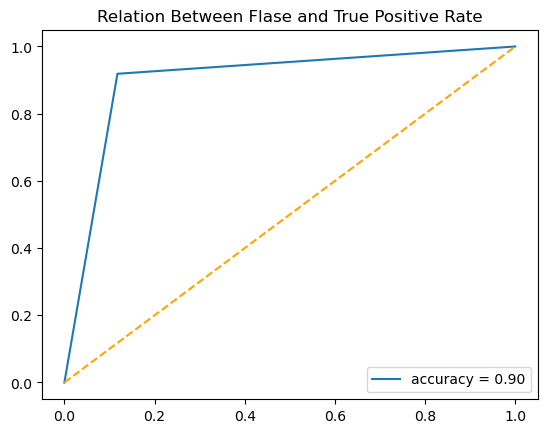

In [96]:
print('accuracy of fpr nad tpr = ','{:.2f}'.format(roc_auc_score(y_test , test_pred)*100),' %')
plt.plot(fpr , tpr , label ='accuracy = {:.2f}'.format(roc_auc_score(y_test , test_pred)))
plt.plot([0,1],[0,1],linestyle='--', color='orange')
plt.title('Relation Between Flase and True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Prediction

In [98]:
prediction = pd.DataFrame()
prediction['actual'] = y_test
prediction['predicted'] = test_pred
prediction

,actual,predicted
23,0,0
23816,1,1
21778,0,0
21093,1,1
42227,1,1
...,...,...
1547,1,1
12422,0,0
17370,0,1
10571,0,0


In [99]:
#apply it on Dataset
prediction = pd.DataFrame()
prediction['actual'] = df1['Income']
prediction['predicted'] = final_model.predict(scaler.transform(df1.drop('Income',axis=1)))
prediction

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
32555,0,0
32556,1,0
32557,0,0
32558,0,0


In [100]:
prediction['actual'] = prediction['actual'].replace({0:'<=50K' , 1:'>50K'})
prediction['predicted'] = prediction['predicted'].replace({0:'<=50K' , 1:'>50K'})
prediction

,actual,predicted
0,<=50K,<=50K
1,<=50K,<=50K
2,<=50K,<=50K
3,<=50K,<=50K
4,<=50K,<=50K
...,...,...
32555,<=50K,<=50K
32556,>50K,<=50K
32557,<=50K,<=50K
32558,<=50K,<=50K
